# EDA를 위한 준비

## 관련 파일 설치 및 다운로드

시각화를 위한 준비

In [125]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

파일 등록을 위한 드라이브 연결

In [126]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


필요한 라이브러리 불러오기

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

데이터 불러오기

In [128]:
point = pd.read_csv('/content/drive/MyDrive/BDA최종과제/final_assignment_point.CSV')
attendance = pd.read_csv('/content/drive/MyDrive/BDA최종과제/final_assginment_attendance.csv')
assignment = pd.read_csv('/content/drive/MyDrive/BDA최종과제/final_assignment_assignment.csv')
class_df = pd.read_csv('/content/drive/MyDrive/BDA최종과제/final_assignment_class.csv')
event_participation = pd.read_csv('/content/drive/MyDrive/BDA최종과제/final_assignment_event_participation.csv')
group_activity = pd.read_csv('/content/drive/MyDrive/BDA최종과제/final_assignment_group_activity.csv')
member = pd.read_csv('/content/drive/MyDrive/BDA최종과제/final_assignment_member.CSV')
report_participation = pd.read_csv('/content/drive/MyDrive/BDA최종과제/final_assignment_report_participation.csv')
satisfaction_survey = pd.read_csv('/content/drive/MyDrive/BDA최종과제/final_assignment_satisfaction_survey.csv')

## 전처리

```
1. null 값 처리
먼저, member 테이블에서 job 컬럼이 null인 행의 모든 null 값을 'Unknown'으로 채웠습니다.
이는 데이터의 완전성을 보장하며, 이후 분석 과정에서 오류를 최소화하기 위함입니다.

2. 학과별 전공자, 비전공자 구분
major1_1과 major1_2 컬럼을 합쳐서 major 컬럼을 생성하였습니다.
null 값은 빈 문자열로 대체하였습니다.
이를 통해 학회원들의 전공 여부를 보다 쉽게 구분할 수 있게 되었습니다.

3. 전공을 카테고리로 매핑
정의된 전공 키워드를 기반으로 학회원들의 전공 여부를 map_major 컬럼으로 매핑하였습니다.
전공 관련 키워드가 있는 경우 '전공'으로, 없는 경우 '비전공'으로 분류되었습니다.
또한, 모든 null 값을 'X'로 채웠습니다.

4. what_to_gain 데이터 정리
what_to_gain 컬럼의 값을 매핑 딕셔너리를 통해 간략화하고, 일관된 형식으로 정리하였습니다.
이를 통해 학회원들이 학회를 통해 얻고자 하는 목적을 효과적으로 분류할 수 있었습니다.

5. 유효 코드 (A~G) 필터링
desired_job 컬럼의 값을 유효 코드(A~G)로 필터링하여 filtered_job 컬럼을 생성하였습니다.
유효 코드에 해당하지 않는 값은 모두 '기타'로 분류되었습니다.

6. 중복된 학회원 ID 정리
중복된 행을 찾아 동일 그룹의 ID를 하나로 통합하였습니다.
이를 통해 데이터의 중복을 제거하고, 일관된 정보 관리가 가능하게 되었습니다.

7. 포인트 계산
각 학회원의 bonus와 minus 포인트를 합산하여 point_df 데이터프레임을 생성하였습니다.
이를 통해 학회원들의 총 점수를 계산하고 평가하였습니다.

변수명 설명

member: 원본 학회원 데이터프레임
categories: 전공 키워드와 전공 여부 매핑 딕셔너리
category_mapping: what_to_gain 컬럼의 매핑 딕셔너리
valid_codes: 유지할 코드 집합
columns: 중복 검사를 위한 컬럼 목록
duplicated_dict: 중복된 학회원 ID의 그룹을 저장하는 딕셔너리
reverse_dict: 중복된 ID를 하나로 통합하기 위한 딕셔너리
point_df: 학회원별 총 포인트를 계산한 데이터프레임
```

### job 컬럼이 null인 행에서, 해당 행의 모든 null 값을 'unknown'으로 채우기

In [129]:
member.loc[member['job'].isnull()] = member.loc[member['job'].isnull()].fillna('Unknown')

/tmp/ipython-input-129-4234691176.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown'
 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown'
 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown'
 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  member.loc[member['job'].isnull()] = member.loc[member['job'].isnull()].fillna('Unknown')
/tmp/ipython-input-129-4234691176.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown'
 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown'
 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'U

### 학과 별 전공자, 비전공자 구분

In [130]:
member['major'] = member['major1_1'].fillna('') + member['major1_2'].fillna('')

# 키워드에 따른 카테고리
categories = {
    '컴퓨터' : '전공',
    '데이터' : '전공',
    '통계' : '전공',
    '인공지능' : '전공',
    'AI' : '전공',
    '소프트웨어' : '전공',
    '산업공학' : '전공',
    '머신러닝' : '전공',
    '경영정보학' : '전공'
}

# 전공을 카테고리로 매핑
def categorize_major(major):
    # major가 문자열일 때만 처리
    if isinstance(major, str):
        for keyword, category in categories.items():
            if keyword in major:
                return category
    return "비전공"

# 결과 매핑
member['map_major'] = member['major'].apply(categorize_major)

null 값 채우기

In [131]:
member.fillna('X', inplace=True)

### what_to_gain 매핑 딕셔너리

In [132]:
category_mapping = {
    '데이터 분석 역량': '데이터 분석 역량',
    '프로젝트 경험': '프로젝트 경험',
    '공모전 경험': '공모전 경험',
    '인적 네트워크': '인적 네트워크',
    'Unknown': 'Unknown',
    '기초적인 python, sql 지식 숙지': '기초 기술(python, sql) 학습',
    '사실 한가지를 고르기 어렵습니다..ㅠㅠ 학회를 통해 위의 4가지와 협업에 계신 전문가님들에게 유익한 정보를 얻고 소중한 경험을 하고 싶습니다.': '4개 항목 해당',
    '공모전과 프로젝트': '공모전 경험, 프로젝트 경험',
    '위 항목 전체': '4개 항목 해당',
    '분석 역량, 공모전 경험, 인적 네트워크': '데이터 분석 역량, 공모전 경험, 인적 네트워크'
}

# 데이터 정리 적용
member['what_to_gain'] = member['what_to_gain'].replace(category_mapping)

### 직업 선택 카테고리 A~G만 남기고 나머지는 '기타' 처리하는 함수 및 적용

In [133]:
# 유지할 코드 (A~G)
valid_codes = {"A", "B", "C", "D", "E", "F", "G"}

# A~G만 남기고 나머지는 '기타' 처리하는 함수
def categorize_jobs(job_string):
    if not isinstance(job_string, str):  # 문자열이 아니면 '기타' 처리
        return "기타"

    # 대괄호 및 공백 제거 후 ','로 분리
    job_list = job_string.strip("[]").split(", ")

    # A~G에 해당하는 코드만 필터링
    filtered = [j.split(".")[0] for j in job_list if j.split(".")[0] in valid_codes]

    # 필터링된 값이 없으면 '기타', 있으면 필터링된 값 반환
    return ", ".join(filtered) if filtered else "기타"

# 새로운 컬럼 추가
member["filtered_job"] = member["desired_job"].apply(categorize_jobs)

# 결과 확인
member[['desired_job', 'filtered_job']]

desired_job filtered_job
0                            B. 데이터 분석가, H. 자연과학계열 연구자            B
1                                             I. 마케터,            기타
2                            B. 데이터 분석가, H. 자연과학계열 연구자            B
3    I. 마케터, 아직 제대로 알지 못해 학회 활동을 통해 진로 직업에 자세히 대해 배...           기타
4                                   B. 데이터 분석가, I. 마케터            B
..                                                 ...          ...
961             A. 데이터 엔지니어, B. 데이터 분석가, C. 데이터 사이언티스트      A, B, C
962                                      C. 데이터 사이언티스트            C
963                          B. 데이터 분석가, C. 데이터 사이언티스트         B, C
964             A. 데이터 엔지니어, B. 데이터 분석가, C. 데이터 사이언티스트      A, B, C
965            A. 데이터 엔지니어, C. 데이터 사이언티스트, D. 인공지능 전문가      A, C, D

[966 rows x 2 columns]

, 기준으로 split -> copy해서 진행

member 원본 구분

In [134]:
member_copy = member.copy()

### 같은 회원이지만 다른 아이디를 가지고 있는 중복 행들을 찾아 정리

중복되는 행 찾기 위한 컬럼 구분

In [135]:
columns = ['major1_1', 'major1_2', 'job', 're_registration',
           'whyBDA', 'time_input', 'what_to_gain', 'desired_job',
           'desired_job_data_ability', 'proficiency_sql', 'proficiency_python',
           'study_experience', 'club_experience', 'society_experience',
           'contest_count', 'project_count']

In [136]:
# 중복된 행들을 찾아서 사전으로 만들기
duplicated_dict = {}

# 중복된 행 찾기
duplicated_rows = member[member.duplicated(subset=columns, keep=False)]

# 각 중복 그룹별로 정리
for _, group in duplicated_rows.groupby(columns):
    ids = group['id'].tolist()  # 해당 그룹의 id들
    if len(ids) > 1:  # 2개 이상 중복된 경우만
        key = ids[0]  # 중복된 값들을 키로 사용
        duplicated_dict[key] = ids[1:]

# 결과 출력
print("중복된 ID 그룹:")
for key, ids in duplicated_dict.items():
    print(f"\n중복 패턴: {key}")
    print(f"중복된 ID들: {ids}")
    print(f"중복 수: {len(ids)}개")
    print("-" * 50)

중복된 ID 그룹:

중복 패턴: c1228ca8add2
중복된 ID들: ['7812fe5e2792']
중복 수: 1개
--------------------------------------------------

중복 패턴: 0f3ce0c2e37d
중복된 ID들: ['5cfe8ce54650']
중복 수: 1개
--------------------------------------------------

중복 패턴: 711b9c8acd9e
중복된 ID들: ['56f76abdafa2']
중복 수: 1개
--------------------------------------------------

중복 패턴: 526eb1aeb6fc
중복된 ID들: ['3aaf670090f2']
중복 수: 1개
--------------------------------------------------

중복 패턴: 7c35693c2fc9
중복된 ID들: ['27fa08707013']
중복 수: 1개
--------------------------------------------------

중복 패턴: 07d3c21df3ee
중복된 ID들: ['f381f6335fe6']
중복 수: 1개
--------------------------------------------------

중복 패턴: 0ad51bf06f0e
중복된 ID들: ['21786392e5f2']
중복 수: 1개
--------------------------------------------------

중복 패턴: aecfb5155505
중복된 ID들: ['df68ea993fb2']
중복 수: 1개
--------------------------------------------------

중복 패턴: 3452ea685ebb
중복된 ID들: ['4ca55292a7ca']
중복 수: 1개
--------------------------------------------------

중복 패턴: feaae2e33417
중복된 I

### 중복된 아이디 딕셔너리를 통하여 하나의 값으로 대체

In [137]:
# 딕셔너리 값이 리스트라면, 리스트 내부 값들을 개별 키로 변환
reverse_dict = {}
for key, values in duplicated_dict.items():
    if isinstance(values, list):  # 값이 리스트라면
        for v in values:
            reverse_dict[v] = key  # 각 값에 대해 매핑
    else:
        reverse_dict[values] = key  # 일반 값은 그대로 매핑

# ID 값 변경 적용
member["id"] = member["id"].replace(reverse_dict)

# 결과 출력
member.head()

id  class_id    major1_1 major1_2  job re_registration  \
0  a952a8eedf73         1       6. 통계        X  대학생             아니요   
1  7b7d838d8b4a         1          경영        X  대학생             아니요   
2  65bb0d9fcabd         1        생명과학        X  대학생             아니요   
3  a42d21c82add         1           X        X  대학생             아니요   
4  ef6b1ad99470         1  경영학 및 빅데이터     경영학과  대학생             아니요   

            whyBDA time_input what_to_gain  \
0  현직자의 강의를 듣고 싶어서        1.0    데이터 분석 역량   
1     혼자 공부하기 어려워서        1.0    데이터 분석 역량   
2     혼자 공부하기 어려워서        2.0    데이터 분석 역량   
3     혼자 공부하기 어려워서        1.0      인적 네트워크   
4     혼자 공부하기 어려워서        2.0    데이터 분석 역량   

                                         desired_job  ... proficiency_sql  \
0                          B. 데이터 분석가, H. 자연과학계열 연구자  ...       사용해본 적 없음   
1                                           I. 마케터,   ...       사용해본 적 없음   
2                          B. 데이터 분석가, H. 자연과학계열 연구자  ...       사용해본 적 없음   
3  I. 마케터, 아직 제대로 알지 못해 학회 활동을 통해 진로 직업에 자세히 대해 배...  ...       사용해본 적 없음   
4                                 B. 데이터 분석가, I. 마케터  ...       사용해본 적 없음   

  proficiency_python study_experience club_experience society_experience  \
0                 초급               1회              0회                 0회   
1          사용해본 적 없음               0회              0회                 0회   
2                 초급               0회              0회                 0회   
3          사용해본 적 없음               0회              0회                 0회   
4          사용해본 적 없음               1회              0회                 0회   

  contest_count project_count           major map_major filtered_job  
0            0회            0회           6. 통계        전공            B  
1            0회            0회              경영       비전공           기타  
2            0회            0회            생명과학       비전공            B  
3            1회            0회                       비전공           기타  
4            0회            0회  경영학 및 빅데이터경영학과        전공            B  

[5 rows x 21 columns]

event_participation & satisfaction_survey 원본 구분

In [138]:
event_participation_copy = event_participation.copy()
satisfaction_survey_copy = satisfaction_survey.copy()

# EDA

## point

point 원본 데이터 확인

In [139]:
point

id  class_id  bonus  minus  point_date
0      42d73f12b66c         1      0      5  2024-08-30
1      aabee5112759         1      0      5  2024-08-30
2      9dc616405c62         1      0      5  2024-08-30
3      bdb3cf66d0de         1      0      5  2024-09-21
4      44b2904dce1e         1      1      0  2024-09-28
...             ...       ...    ...    ...         ...
10812  36cb46fe0144        11      0      1  2024-11-17
10813  36cb46fe0144        11      0      1  2024-11-24
10814  36cb46fe0144        11      0      1  2024-11-24
10815  36cb46fe0144        11      0      1  2025-01-05
10816  36cb46fe0144        11      0      1  2025-01-05

[10817 rows x 5 columns]

### point_df 생성 - point 테이블을 이용하여 세그먼트를 나누기 위해 아이디 별로 점수 계산

In [140]:
point_df = pd.DataFrame()
point_df['point'] = point.groupby('id')['bonus'].sum()
point_df['minus'] = point.groupby('id')['minus'].sum()
point_df['score'] = point_df['point'] - point_df['minus']

point_df 확인

In [141]:
point_df

point  minus  score
id                               
002e60490b77      0     31    -31
007b7715a81f      1     42    -41
0085542278b4      0      2     -2
00bcc509d9b0      4     42    -38
00e80b873d5f      5      0      5
...             ...    ...    ...
feaae2e33417      0     39    -39
fee7f523c37d      1      4     -3
ff9ee45023dd      1     76    -75
ffa303255931      7      1      6
ffd4058697d0      0     56    -56

[966 rows x 3 columns]

## merge

```markdown
id 중복 피해 X
total_df_X 데이터프레임 생성
member_copy와 point_df를 병합합니다.
이후 attendance, assignment, group_activity 데이터를 순차적으로 병합합니다.

major1_1, major1_2, desired_job, major 컬럼 제거
group_master, on_offline, group_leave 컬럼의 null 값을 'X'로 대체합니다.

딕셔너리 reverse_dict을 통해 각 ID의 중복 값을 원래 ID로 변경합니다.
total_df_X 데이터프레임의 id 값을 업데이트 합니다.

week2, week3_y, week4_y, week5_y, week6_y, week7_y, week8_y, week9_y 컬럼의 null 값을 0으로 대체합니다.
week4_x, week5_x, week6_x 컬럼의 null 값을 0으로 대체합니다.

float_num 리스트에 속한 컬럼들을 정수형(int)으로 변환합니다.

attendance_지각과 attendance_결석 컬럼 생성
attendance_columns 리스트에 속한 컬럼들과 관련된 지각 및 결석을 계산하여 새로운 컬럼으로 추가합니다.

assignment_지각과 assignment_결석 컬럼 생성
assignment_columns 리스트에 속한 컬럼들과 관련된 지각 및 결석을 계산하여 새로운 컬럼으로 추가합니다.

새로운 컬럼 category를 생성하고 기본값을 "미수료 학회원"으로 설정합니다.
score와 minus 값에 따라 category 값을 업데이트 합니다.
score가 -20 이상이면 "수료 학회원", minus가 5 이하이면 "우수 학회원 후보"로 분류합니다.

만족도 조사를 위해 total_df_s 데이터프레임 생성
member_copy와 satisfaction_survey_copy를 병합합니다.
null 값을 'X'로 대체합니다.

딕셔너리 reverse_dict을 통해 각 ID의 중복 값을 원래 ID로 변경합니다.
total_df_s 데이터프레임의 id 값을 업데이트 합니다.

이벤트 참여 데이터를 위해 total_df_e 데이터프레임 생성
member_copy와 event_participation_copy를 병합합니다.
null 값을 'X'로 대체합니다.

딕셔너리 reverse_dict을 통해 각 ID의 중복 값을 원래 ID로 변경합니다.
total_df_e 데이터프레임의 id 값을 업데이트 합니다.

part 데이터프레임 생성 (category, id, class_id 컬럼을 포함)
total_df_X에서 'category', 'id', 'class_id' 컬럼을 추출합니다.

총 만족도 조사 데이터를 위해 sat_df_s 데이터프레임 생성
total_df_s와 part를 병합합니다.
최종 category 값을 포함합니다.
```

```markdown
## 변수명 설명

### 데이터프레임
- total_df_X: member_copy, point_df 및 추가적으로 attendance, assignment, group_activity 데이터를 포함하여 병합한 데이터프레임.
- total_df_s: member_copy와 satisfaction_survey_copy를 병합한 데이터프레임으로, 만족도 조사 데이터를 담고 있음.
- total_df_e: member_copy와 event_participation_copy를 병합한 데이터프레임으로, 이벤트 참여 데이터를 담고 있음.
- part: total_df_X에서 추출한 'category', 'id', 'class_id' 컬럼을 포함한 데이터프레임.
- sat_df_s: total_df_s와 part를 병합한 데이터프레임으로, 총 만족도 조사 데이터를 포함함.

### 컬럼/변수
- reverse_dict: 중복된 ID 값을 원래 ID로 매핑하기 위한 딕셔너리.
- attendance_columns: attendance 관련 데이터 컬럼 리스트.
- assignment_columns: assignment 관련 데이터 컬럼 리스트.
- float_num: 실수형 데이터를 저장하는 컬럼 리스트.
- category: 학회원의 분류 상태를 나타내는 컬럼. 기본값은 "미수료 학회원".
- score: 학회원의 총 점수를 나타내는 컬럼.
- minus: 학회원의 감점 포인트를 나타내는 컬럼.

### 기타
- duplicated_dict: 중복된 행들을 관리하기 위한 딕셔너리.
- member_copy: 원본 member 데이터프레임의 복사본.
- point_df: 학회원의 bonus와 minus 포인트를 계산한 데이터프레임.
- attendance: 출석 데이터.
- assignment: 과제 데이터.
- group_activity: 그룹 활동 데이터.
- satisfaction_survey_copy: 원본 만족도 조사 데이터프레임의 복사본.
- event_participation_copy: 원본 이벤트 참여 데이터프레임의 복사본.
```

### id 중복이 존재할 때 피해가 없는 테이블만 MERGE

In [142]:
## id 중복 피해 X
total_df_X = pd.merge(member_copy, point_df, on= ['id'], how = 'left')
total_df_X = pd.merge(total_df_X, attendance, on = ['id', 'class_id'], how = 'left')
total_df_X = pd.merge(total_df_X, assignment, on = ['id', 'class_id'], how = 'left')
total_df_X = pd.merge(total_df_X, group_activity, on = ['id', 'class_id'], how = 'left')

merge 후 필요 없는 컬럼 삭제

In [143]:
total_df_X.drop(columns=['major1_1', 'major1_2', 'desired_job', 'major'], inplace=True)

해당 컬럼 null 값 X로 채우기

In [144]:
total_df_X[['group_master', 'on_offline', 'group_leave']] = total_df_X[['group_master', 'on_offline', 'group_leave']].fillna('X')

중복된 아이디 딕셔너리를 통하여 하나의 값으로 대체

In [145]:
# 딕셔너리 값이 리스트라면, 리스트 내부 값들을 개별 키로 변환
reverse_dict = {}
for key, values in duplicated_dict.items():
    if isinstance(values, list):  # 값이 리스트라면
        for v in values:
            reverse_dict[v] = key  # 각 값에 대해 매핑
    else:
        reverse_dict[values] = key  # 일반 값은 그대로 매핑

# ID 값 변경 적용
total_df_X["id"] = total_df_X["id"].replace(reverse_dict)

# 결과 출력
total_df_X.head()

id  class_id  job re_registration           whyBDA time_input  \
0  a952a8eedf73         1  대학생             아니요  현직자의 강의를 듣고 싶어서        1.0   
1  7b7d838d8b4a         1  대학생             아니요     혼자 공부하기 어려워서        1.0   
2  65bb0d9fcabd         1  대학생             아니요     혼자 공부하기 어려워서        2.0   
3  a42d21c82add         1  대학생             아니요     혼자 공부하기 어려워서        1.0   
4  ef6b1ad99470         1  대학생             아니요     혼자 공부하기 어려워서        2.0   

  what_to_gain desired_job_data_ability proficiency_sql proficiency_python  \
0    데이터 분석 역량                      8.0       사용해본 적 없음                 초급   
1    데이터 분석 역량                      8.0       사용해본 적 없음          사용해본 적 없음   
2    데이터 분석 역량                      8.0       사용해본 적 없음                 초급   
3      인적 네트워크                      7.0       사용해본 적 없음          사용해본 적 없음   
4    데이터 분석 역량                      7.0       사용해본 적 없음          사용해본 적 없음   

   ... week3_y week4_y week5_y week6_y week7_y week8_y week9_y  group_master  \
0  ...     2.0     2.0     2.0     2.0     2.0     2.0     2.0             X   
1  ...     2.0     2.0     1.0     2.0     2.0     2.0     2.0             X   
2  ...     2.0     0.0     0.0     0.0     0.0     0.0     0.0             X   
3  ...     2.0     0.0     2.0     0.0     0.0     0.0     0.0         False   
4  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0             X   

   on_offline  group_leave  
0           X            X  
1           X            X  
2           X            X  
3        오프라인        False  
4           X            X  

[5 rows x 39 columns]

해당 컬럼 null 값 0으로 채우기

In [146]:
total_df_X[['week2', 'week3_y', 'week4_y', 'week5_y', 'week6_y', 'week7_y', 'week8_y', 'week9_y']] = total_df_X[['week2', 'week3_y', 'week4_y', 'week5_y', 'week6_y', 'week7_y', 'week8_y', 'week9_y']].fillna(0)
total_df_X[['week4_x', 'week5_x', 'week6_x']] = total_df_X[['week4_x', 'week5_x', 'week6_x']].fillna(0)

해당 컬럼 정수형으로 변경

In [147]:
float_num = ['week4_x', 'week5_x', 'week6_x', 'week2', 'week3_y', 'week4_y', 'week5_y', 'week6_y', 'week7_y', 'week8_y', 'week9_y']
for col in float_num:
    total_df_X[col] = total_df_X[col].astype(int)

attendance_지각과 attendance_결석 컬럼 생성

In [148]:
attendance_columns = ['week3_x', 'week4_x', 'week5_x', 'week6_x', 'week7_x', 'week8_x', 'week9_x', 'week10']
total_df_X['attendance_지각'] = total_df_X[attendance_columns].apply(lambda row: (row == 1).sum(), axis=1)
total_df_X['attendance_결석'] = total_df_X[attendance_columns].apply(lambda row: (row == 0).sum(), axis=1)

assignment_지각과 assignment_결석 컬럼 생성

In [149]:
assignment_columns = ['week2', 'week3_y', 'week4_y', 'week5_y', 'week6_y', 'week7_y', 'week8_y', 'week9_y']
total_df_X['assignment_지각'] = total_df_X[assignment_columns].apply(lambda row: (row == 1).sum(), axis=1)
total_df_X['assignment_결석'] = total_df_X[assignment_columns].apply(lambda row: (row == 0).sum(), axis=1)

새로운 컬럼 생성 및 기본값 설정

In [150]:
# 새로운 컬럼 생성 및 기본값 설정
total_df_X["category"] = "미수료 학회원"  # 기본값을 "미수료 학회원"으로 설정

# 조건에 따라 값을 변경
total_df_X.loc[total_df_X['score'] >= -20, "category"] = "수료 학회원"  # score가 -20 이상인 경우
total_df_X.loc[total_df_X['minus'] <= 5, "category"] = "우수 학회원 후보"  # minus가 5 이하인 경우

세그먼트 나눈 후 확인

In [151]:
total_df_X['category'].value_counts()

category
미수료 학회원      525
수료 학회원       254
우수 학회원 후보    187
Name: count, dtype: int64

### 멤버 테이블 원본과 만족도 조사 관련 테이블 원본 merge -> total_df_s

In [152]:
total_df_s = pd.merge(member_copy, satisfaction_survey_copy, on= ['id', 'class_id'], how = 'left')
total_df_s.head()

id  class_id    major1_1 major1_2  job re_registration  \
0  a952a8eedf73         1       6. 통계        X  대학생             아니요   
1  7b7d838d8b4a         1          경영        X  대학생             아니요   
2  65bb0d9fcabd         1        생명과학        X  대학생             아니요   
3  a42d21c82add         1           X        X  대학생             아니요   
4  ef6b1ad99470         1  경영학 및 빅데이터     경영학과  대학생             아니요   

            whyBDA time_input what_to_gain  \
0  현직자의 강의를 듣고 싶어서        1.0    데이터 분석 역량   
1     혼자 공부하기 어려워서        1.0    데이터 분석 역량   
2     혼자 공부하기 어려워서        2.0    데이터 분석 역량   
3     혼자 공부하기 어려워서        1.0      인적 네트워크   
4     혼자 공부하기 어려워서        2.0    데이터 분석 역량   

                                         desired_job  ... survey_month  \
0                          B. 데이터 분석가, H. 자연과학계열 연구자  ...          NaN   
1                                           I. 마케터,   ...     202411.0   
2                          B. 데이터 분석가, H. 자연과학계열 연구자  ...          NaN   
3  I. 마케터, 아직 제대로 알지 못해 학회 활동을 통해 진로 직업에 자세히 대해 배...  ...          NaN   
4                                 B. 데이터 분석가, I. 마케터  ...          NaN   

  class_recommendation operating bda_wave bda_study bda_job bda_bootcamp  \
0                  NaN       NaN      NaN       NaN     NaN          NaN   
1                  8.0       8.0      NaN       NaN     NaN          NaN   
2                  NaN       NaN      NaN       NaN     NaN          NaN   
3                  NaN       NaN      NaN       NaN     NaN          NaN   
4                  NaN       NaN      NaN       NaN     NaN          NaN   

  overall_bda group_project cafe_recommendation  
0         NaN           NaN                 NaN  
1         8.0           NaN                 NaN  
2         NaN           NaN                 NaN  
3         NaN           NaN                 NaN  
4         NaN           NaN                 NaN  

[5 rows x 31 columns]

total_df_s null 값 X로 채우기

In [153]:
total_df_s.fillna('X', inplace=True)

/tmp/ipython-input-153-1765227733.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'X' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  total_df_s.fillna('X', inplace=True)


중복된 아이디 딕셔너리를 통하여 하나의 값으로 대체

In [154]:
# 딕셔너리 값이 리스트라면, 리스트 내부 값들을 개별 키로 변환
reverse_dict = {}
for key, values in duplicated_dict.items():
    if isinstance(values, list):  # 값이 리스트라면
        for v in values:
            reverse_dict[v] = key  # 각 값에 대해 매핑
    else:
        reverse_dict[values] = key  # 일반 값은 그대로 매핑

# ID 값 변경 적용
total_df_s["id"] = total_df_s["id"].replace(reverse_dict)

# 결과 출력
total_df_s.head()

id  class_id    major1_1 major1_2  job re_registration  \
0  a952a8eedf73         1       6. 통계        X  대학생             아니요   
1  7b7d838d8b4a         1          경영        X  대학생             아니요   
2  65bb0d9fcabd         1        생명과학        X  대학생             아니요   
3  a42d21c82add         1           X        X  대학생             아니요   
4  ef6b1ad99470         1  경영학 및 빅데이터     경영학과  대학생             아니요   

            whyBDA time_input what_to_gain  \
0  현직자의 강의를 듣고 싶어서        1.0    데이터 분석 역량   
1     혼자 공부하기 어려워서        1.0    데이터 분석 역량   
2     혼자 공부하기 어려워서        2.0    데이터 분석 역량   
3     혼자 공부하기 어려워서        1.0      인적 네트워크   
4     혼자 공부하기 어려워서        2.0    데이터 분석 역량   

                                         desired_job  ... survey_month  \
0                          B. 데이터 분석가, H. 자연과학계열 연구자  ...            X   
1                                           I. 마케터,   ...     202411.0   
2                          B. 데이터 분석가, H. 자연과학계열 연구자  ...            X   
3  I. 마케터, 아직 제대로 알지 못해 학회 활동을 통해 진로 직업에 자세히 대해 배...  ...            X   
4                                 B. 데이터 분석가, I. 마케터  ...            X   

  class_recommendation operating bda_wave bda_study bda_job bda_bootcamp  \
0                    X         X        X         X       X            X   
1                  8.0       8.0        X         X       X            X   
2                    X         X        X         X       X            X   
3                    X         X        X         X       X            X   
4                    X         X        X         X       X            X   

  overall_bda group_project cafe_recommendation  
0           X             X                   X  
1         8.0             X                   X  
2           X             X                   X  
3           X             X                   X  
4           X             X                   X  

[5 rows x 31 columns]

### 멤버 테이블 원본과 행사 참여 테이블 원본 merge -> total_df_e

In [155]:
total_df_e = pd.merge(member_copy, event_participation_copy, on = ['id', 'class_id'], how = 'left')
total_df_e.head()

id  class_id    major1_1 major1_2  job re_registration  \
0  a952a8eedf73         1       6. 통계        X  대학생             아니요   
1  7b7d838d8b4a         1          경영        X  대학생             아니요   
2  65bb0d9fcabd         1        생명과학        X  대학생             아니요   
3  a42d21c82add         1           X        X  대학생             아니요   
4  ef6b1ad99470         1  경영학 및 빅데이터     경영학과  대학생             아니요   

            whyBDA time_input what_to_gain  \
0  현직자의 강의를 듣고 싶어서        1.0    데이터 분석 역량   
1     혼자 공부하기 어려워서        1.0    데이터 분석 역량   
2     혼자 공부하기 어려워서        2.0    데이터 분석 역량   
3     혼자 공부하기 어려워서        1.0      인적 네트워크   
4     혼자 공부하기 어려워서        2.0    데이터 분석 역량   

                                         desired_job  ... study_experience  \
0                          B. 데이터 분석가, H. 자연과학계열 연구자  ...               1회   
1                                           I. 마케터,   ...               0회   
2                          B. 데이터 분석가, H. 자연과학계열 연구자  ...               0회   
3  I. 마케터, 아직 제대로 알지 못해 학회 활동을 통해 진로 직업에 자세히 대해 배...  ...               0회   
4                                 B. 데이터 분석가, I. 마케터  ...               1회   

  club_experience society_experience contest_count project_count  \
0              0회                 0회            0회            0회   
1              0회                 0회            0회            0회   
2              0회                 0회            0회            0회   
3              0회                 0회            1회            0회   
4              0회                 0회            0회            0회   

            major map_major filtered_job event_name event_date  
0           6. 통계        전공            B        NaN        NaN  
1              경영       비전공           기타        NaN        NaN  
2            생명과학       비전공            B        NaN        NaN  
3                       비전공           기타        NaN        NaN  
4  경영학 및 빅데이터경영학과        전공            B        NaN        NaN  

[5 rows x 23 columns]

 total_df_e null 값 X로 채우기

In [156]:
total_df_e.fillna('X', inplace=True)

/tmp/ipython-input-156-2259948590.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'X' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  total_df_e.fillna('X', inplace=True)


중복된 아이디 딕셔너리를 통하여 하나의 값으로 대체

In [157]:
# 딕셔너리 값이 리스트라면, 리스트 내부 값들을 개별 키로 변환
reverse_dict = {}
for key, values in duplicated_dict.items():
    if isinstance(values, list):  # 값이 리스트라면
        for v in values:
            reverse_dict[v] = key  # 각 값에 대해 매핑
    else:
        reverse_dict[values] = key  # 일반 값은 그대로 매핑

# ID 값 변경 적용
total_df_e["id"] = total_df_e["id"].replace(reverse_dict)

# 결과 출력
total_df_e.head()

id  class_id    major1_1 major1_2  job re_registration  \
0  a952a8eedf73         1       6. 통계        X  대학생             아니요   
1  7b7d838d8b4a         1          경영        X  대학생             아니요   
2  65bb0d9fcabd         1        생명과학        X  대학생             아니요   
3  a42d21c82add         1           X        X  대학생             아니요   
4  ef6b1ad99470         1  경영학 및 빅데이터     경영학과  대학생             아니요   

            whyBDA time_input what_to_gain  \
0  현직자의 강의를 듣고 싶어서        1.0    데이터 분석 역량   
1     혼자 공부하기 어려워서        1.0    데이터 분석 역량   
2     혼자 공부하기 어려워서        2.0    데이터 분석 역량   
3     혼자 공부하기 어려워서        1.0      인적 네트워크   
4     혼자 공부하기 어려워서        2.0    데이터 분석 역량   

                                         desired_job  ... study_experience  \
0                          B. 데이터 분석가, H. 자연과학계열 연구자  ...               1회   
1                                           I. 마케터,   ...               0회   
2                          B. 데이터 분석가, H. 자연과학계열 연구자  ...               0회   
3  I. 마케터, 아직 제대로 알지 못해 학회 활동을 통해 진로 직업에 자세히 대해 배...  ...               0회   
4                                 B. 데이터 분석가, I. 마케터  ...               1회   

  club_experience society_experience contest_count project_count  \
0              0회                 0회            0회            0회   
1              0회                 0회            0회            0회   
2              0회                 0회            0회            0회   
3              0회                 0회            1회            0회   
4              0회                 0회            0회            0회   

            major map_major filtered_job event_name event_date  
0           6. 통계        전공            B          X          X  
1              경영       비전공           기타          X          X  
2            생명과학       비전공            B          X          X  
3                       비전공           기타          X          X  
4  경영학 및 빅데이터경영학과        전공            B          X          X  

[5 rows x 23 columns]

total_df_s와 part를 id, class_id 기준으로 merge

In [158]:
# part 데이터프레임 생성 (category, id, class_id 컬럼을 포함)
part = total_df_X[['category', 'id', 'class_id']]

sat_df_s = pd.merge(total_df_s, part, on = ['id', 'class_id'], how = 'left')
sat_df_s['category']

0       우수 학회원 후보
1       우수 학회원 후보
2         미수료 학회원
3         미수료 학회원
4         미수료 학회원
          ...    
1046       수료 학회원
1047       수료 학회원
1048       수료 학회원
1049      미수료 학회원
1050      미수료 학회원
Name: category, Length: 1051, dtype: object

total_df_e와 part를 id, class_id 기준으로 merge

In [159]:
#part 데이터프레임 생성 (category, id, class_id 컬럼을 포함)
part = total_df_X[['category', 'id', 'class_id']]

sat_df_e = pd.merge(total_df_e, part, on = ['id', 'class_id'], how = 'left')
sat_df_e['category']

0       우수 학회원 후보
1       우수 학회원 후보
2         미수료 학회원
3         미수료 학회원
4         미수료 학회원
          ...    
1409       수료 학회원
1410       수료 학회원
1411       수료 학회원
1412      미수료 학회원
1413      미수료 학회원
Name: category, Length: 1414, dtype: object

## 지원 동기 별 만족도

```
세그먼트 별 지원 동기
- 각 세그먼트의 학회원들이 BDA에 지원한 동기를 시각화

세그먼트 별 이벤트 만족도 (만족도 조사에 참여하지 않은 경우 제외)
- 각 세그먼트 별로 BDA와 관련된 다양한 이벤트에 대한 만족도를 시각화 (bda_bootcamp, bda_wave, bda_job 항목별)

세그먼트 별 이벤트 참여 횟수
- 각 세그먼트가 다양한 이벤트에 얼마나 참여했는지 시각화

X 항목 제외 세그먼트 별 이벤트 참여 횟수
- 'X' 항목을 제외한 각 세그먼트가 이벤트에 얼마나 참여했는지 시각화

세그먼트 별 전체적인 학회 점수 (만족도 조사에 참여하지 않은 경우 제외)
- 각 세그먼트의 학회원들이 BDA에 대한 전반적인 만족도를 시각화

세그먼트 별 학회 운영 점수 (만족도 조사에 참여하지 않은 경우 제외)
- 각 세그먼트의 학회원들이 BDA 운영에 대해 어떻게 평가하는지 시각화

세그먼트 별 스터디 점수 (만족도 조사에 참여하지 않은 경우 제외)
- 각 세그먼트의 학회원들이 스터디에 대해 어떻게 평가하는지 시각화

세그먼트 별 네이버 카페 추천 점수 (cafe_recommendation)
- 각 세그먼트의 학회원들이 카페에 대해서 어떻게 평가하는지 시각화

세그먼트 별 조별활동 점수 (만족도 조사에 참여하지 않은 경우 제외)
- 각 세그먼트의 학회원들이 조별활동에 대해 어떻게 평가하는지 시각화
```

### 세그먼트 별 지원 동기

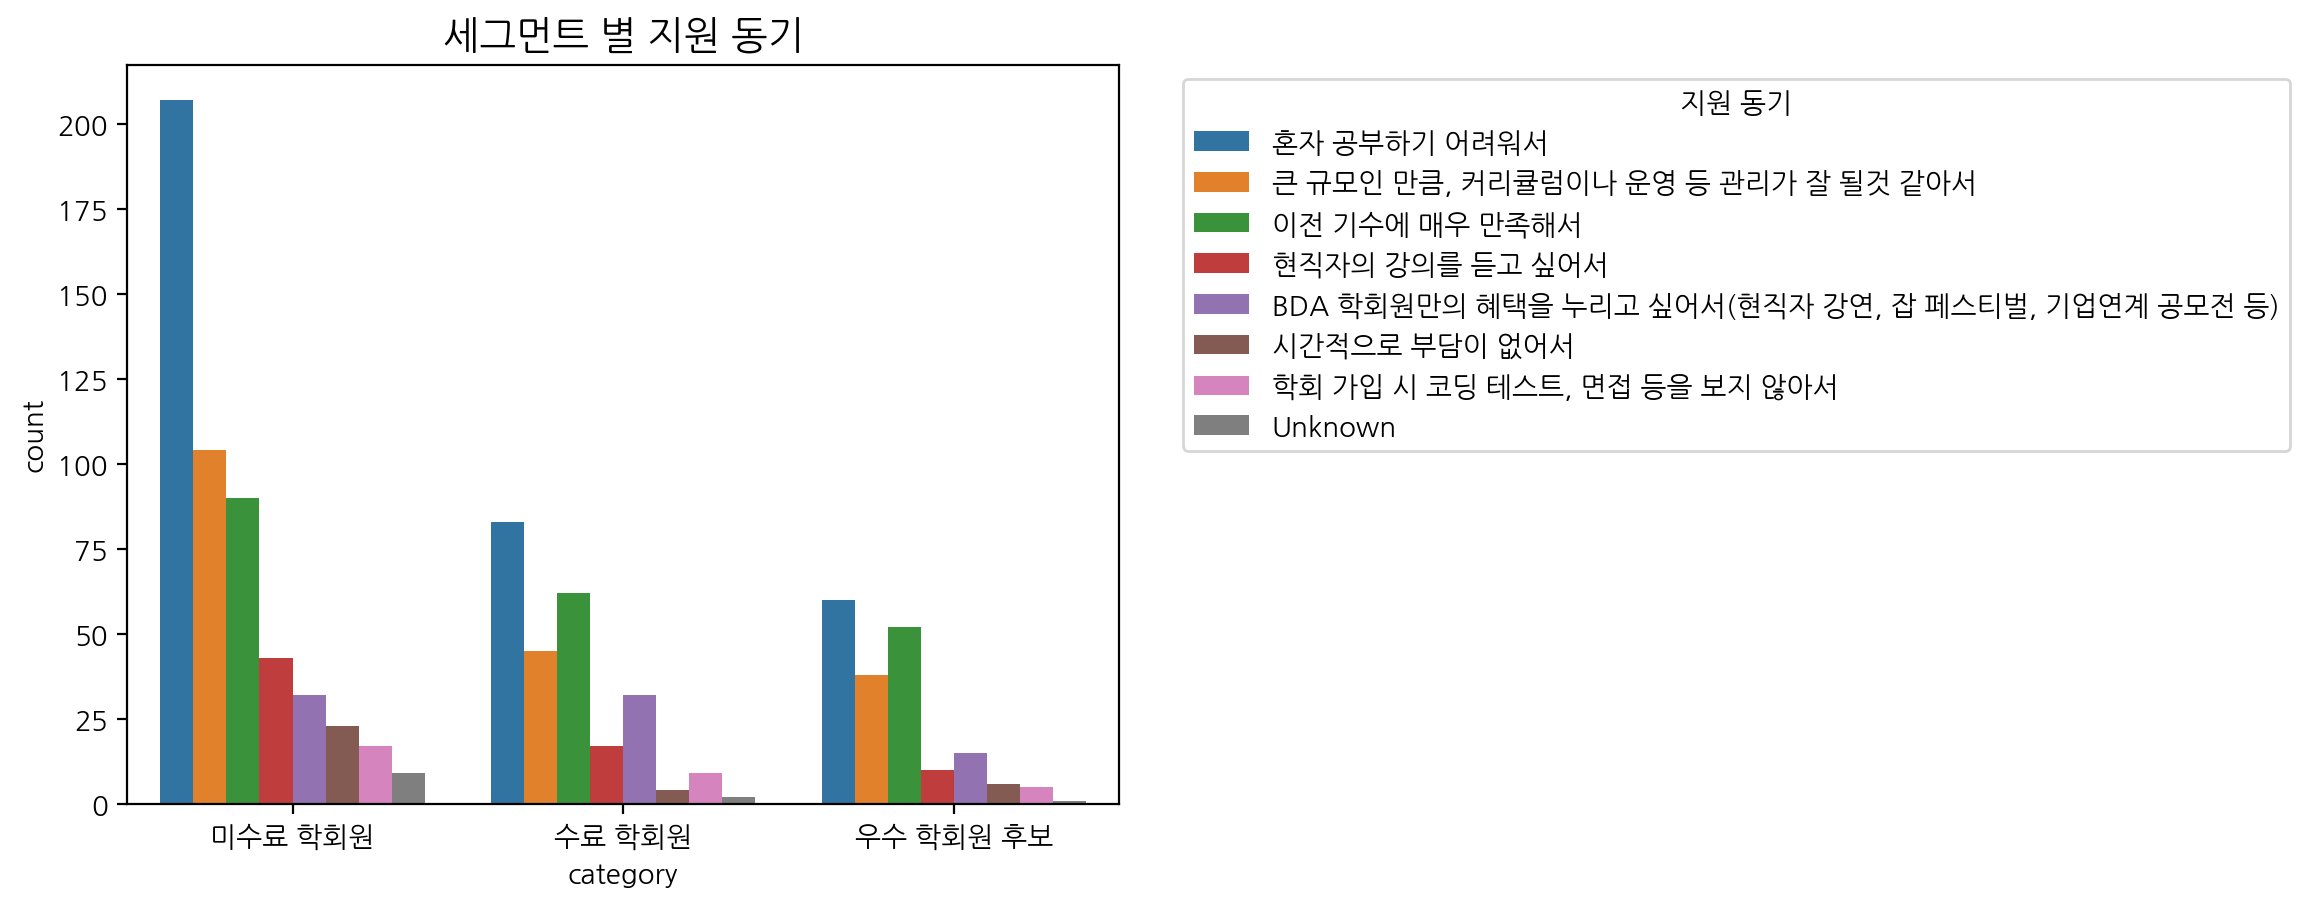

In [160]:
count_df = total_df_X.groupby('category')['whyBDA'].value_counts().reset_index()

sns.barplot(x = 'category', y = 'count', hue = 'whyBDA', data = count_df)
plt.legend(title="지원 동기", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("세그먼트 별 지원 동기", fontsize=14)
plt.show()

- 혼자 공부하기 어려워서 지원하게 되었던 학회원들이 수료를 완료하지 못한 경우가 많았음을 확인할 수 있음
- 큰 규모이며 커리큘럼이나 운영 등 관리가 잘 될 것 같아서가 두번째였음

→ 수료를 완료하지 못했던 학회원들을 겨냥해 잘 짜여져 있는 커리큘럼과 관리 등을 보여주어야 할 것

### 세그먼트별 이벤트 만족도 (bda_bootcamp, bda_wave, bda_job)

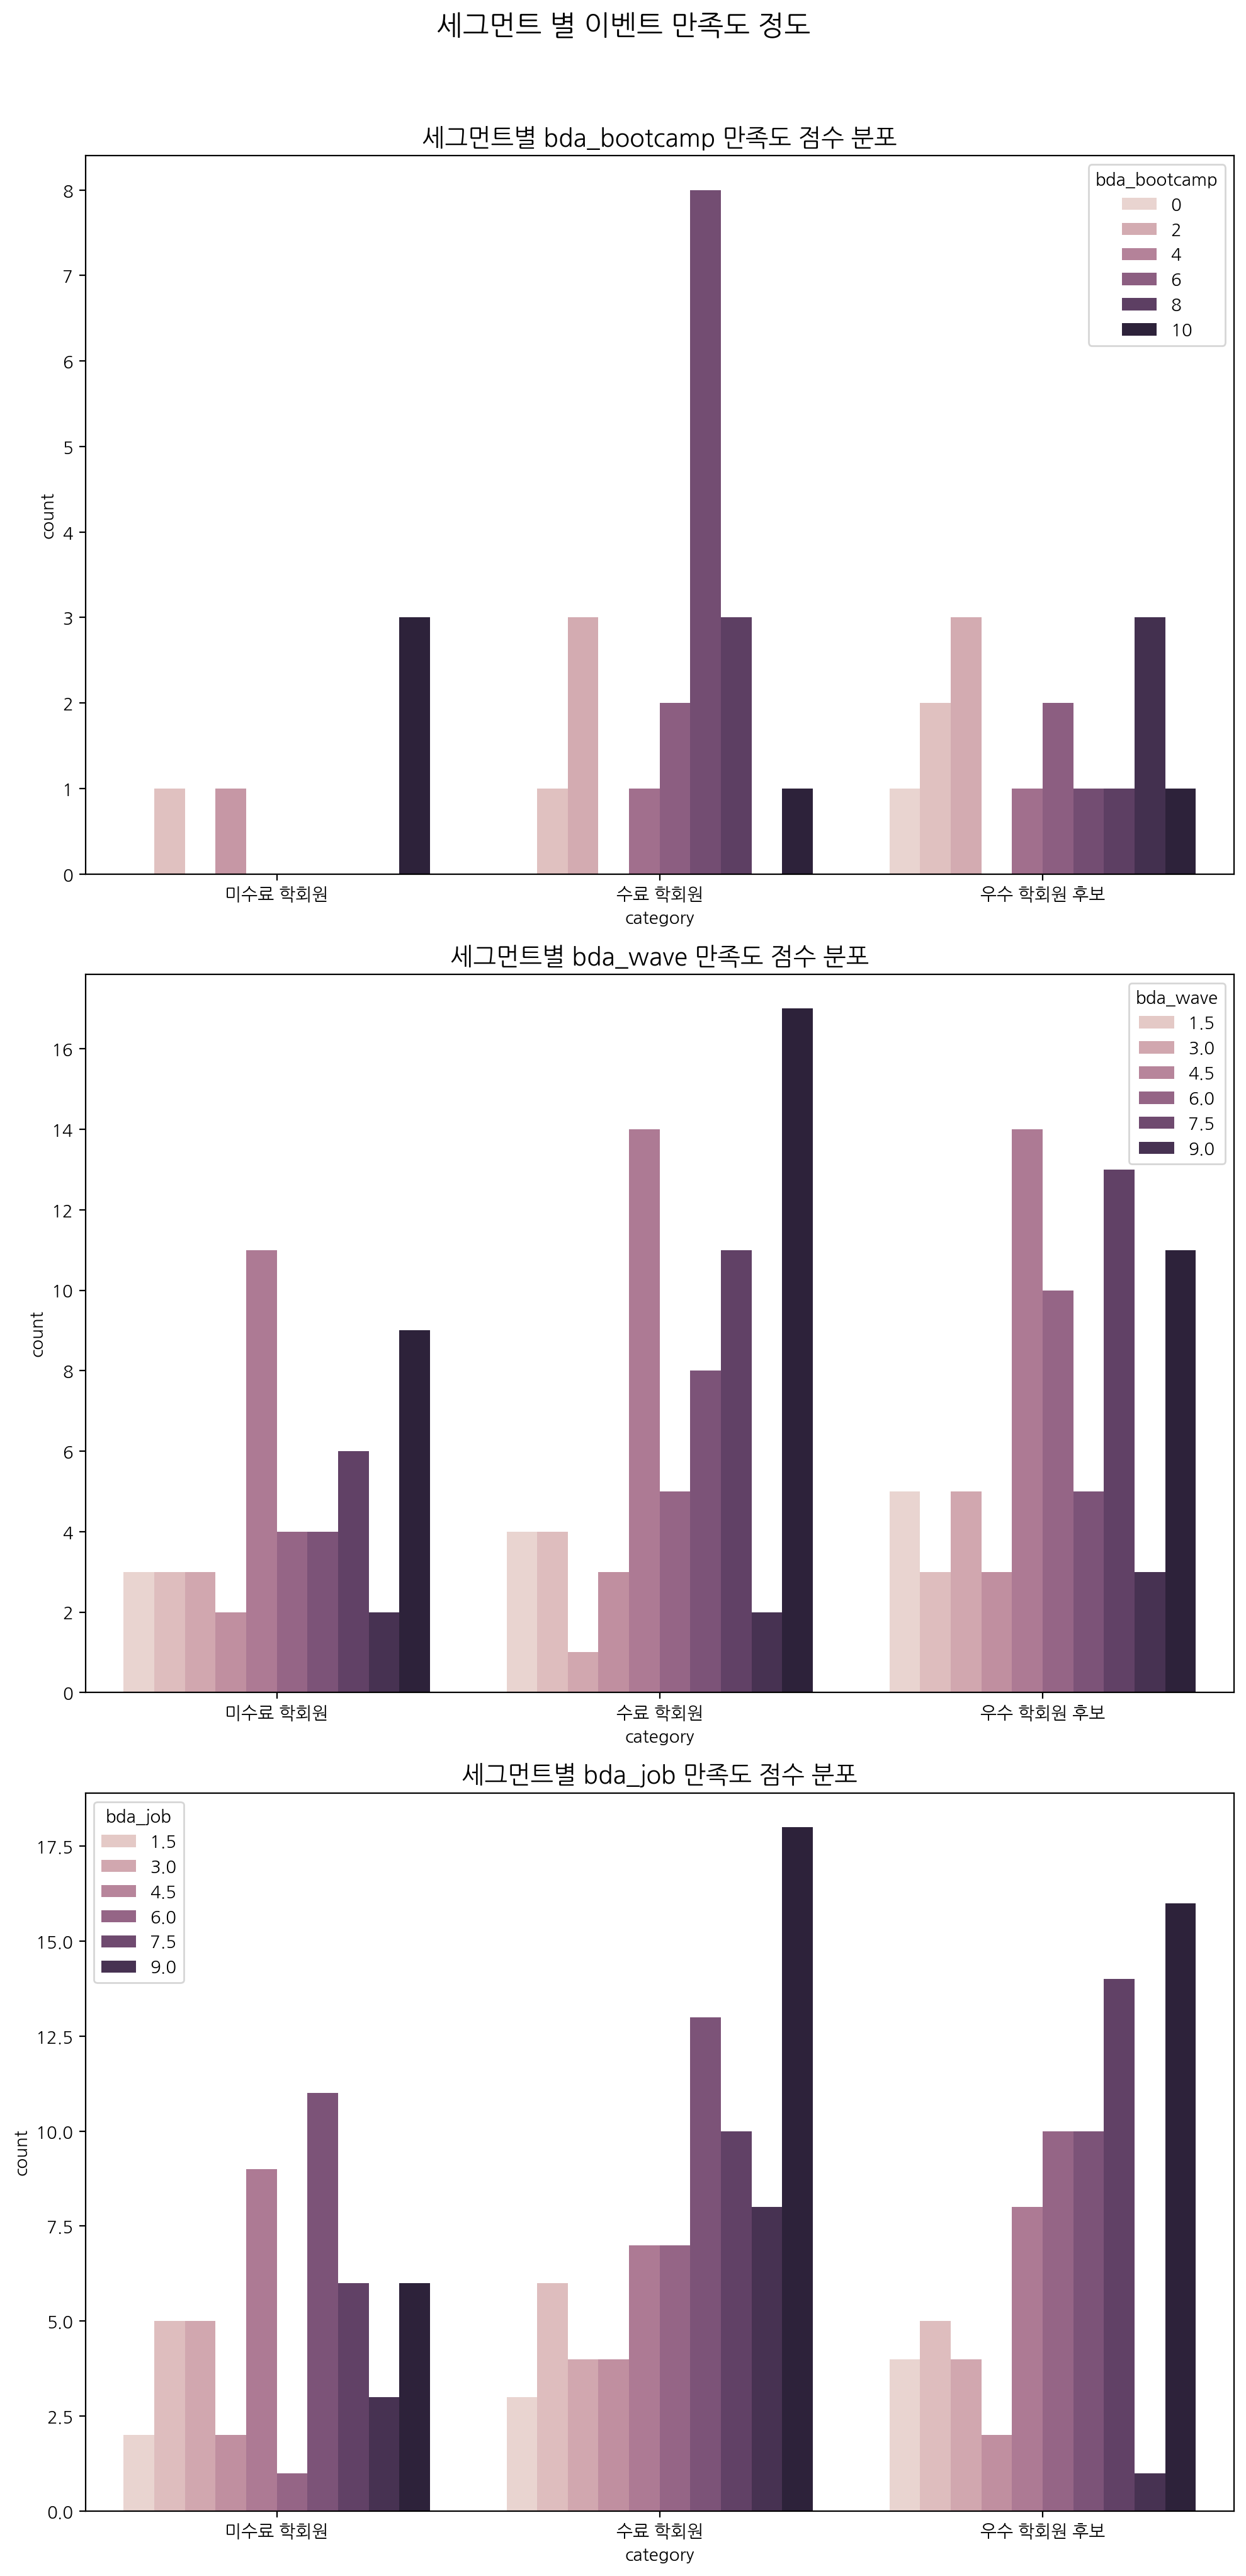

In [161]:
# 데이터 준비
fig, axes = plt.subplots(3, 1, figsize=(10, 20))

# 첫 번째 서브플롯
count_df = sat_df_s[sat_df_s['bda_bootcamp'] != 'X'].groupby('category')['bda_bootcamp'].value_counts().reset_index(name='count')
sns.barplot(x='category', y='count', hue='bda_bootcamp', data=count_df, ax=axes[0])
axes[0].set_title("세그먼트별 bda_bootcamp 만족도 점수 분포", fontsize=14)

# 두 번째 서브플롯
count_df = sat_df_s[sat_df_s['bda_wave'] != 'X'].groupby('category')['bda_wave'].value_counts().reset_index(name='count')
sns.barplot(x='category', y='count', hue='bda_wave', data=count_df, ax=axes[1])
axes[1].set_title("세그먼트별 bda_wave 만족도 점수 분포", fontsize=14)

# 세 번째 서브플롯
count_df = sat_df_s[sat_df_s['bda_job'] != 'X'].groupby('category')['bda_job'].value_counts().reset_index(name='count')
sns.barplot(x='category', y='count', hue='bda_job', data=count_df, ax=axes[2])
axes[2].set_title("세그먼트별 bda_job 만족도 점수 분포", fontsize=14)

# 전체 제목 설정
fig.suptitle("세그먼트 별 이벤트 만족도 정도", fontsize=16, y=1.02)

# 레이아웃 조정 및 그래프 출력
plt.tight_layout()
plt.show()

- 우수 학회원의 경우 bda_job 에 대해 높은 만족도를 보임
- 수료 학회원의 경우 bda_wave 에 대해 높은 만족도를 보임
- bda_bootcamp에 대해 모든 세그먼트에서 낮은 만족도를 보였음을 확인

### 세그먼트 별 이벤트 참여 정도

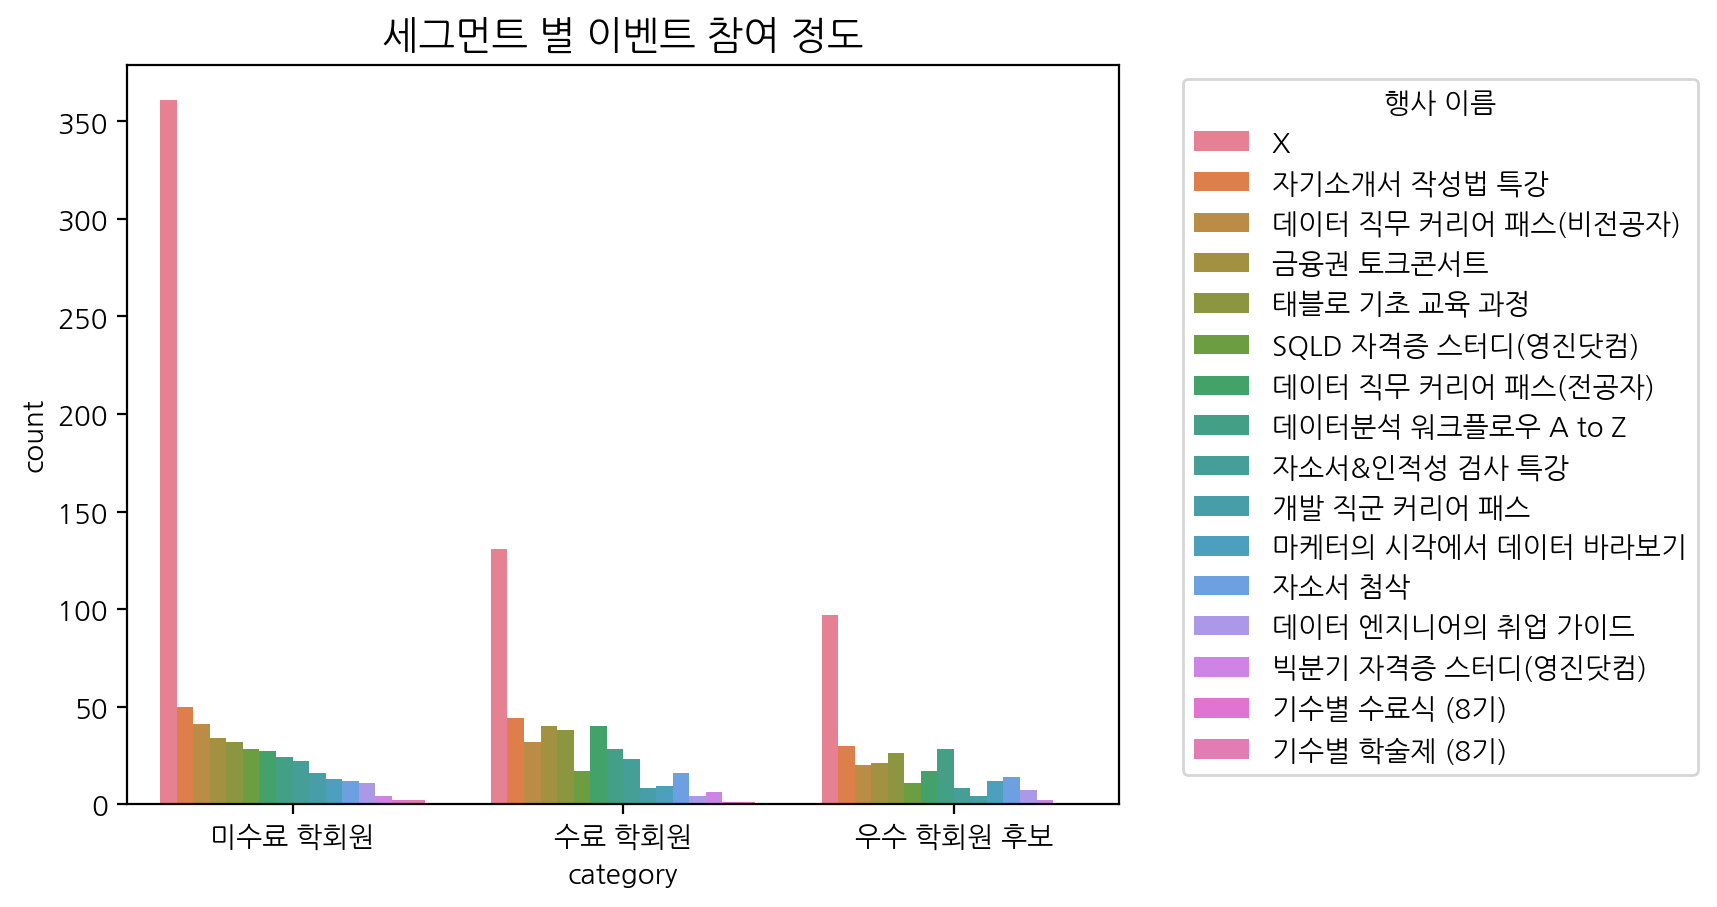

In [162]:
count_df = sat_df_e.groupby('category')['event_name'].value_counts().reset_index()

sns.barplot(x = 'category', y = 'count', hue = 'event_name', data = count_df)
plt.legend(title="행사 이름", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("세그먼트 별 이벤트 참여 정도", fontsize=14)
plt.show()

- 이벤트에 참여하지 않은 경우가 가장 많았음

### 세그먼트 별 이벤트 참여 정도 X 항목 제외 (아예 참여하지 않는 경우 제외)

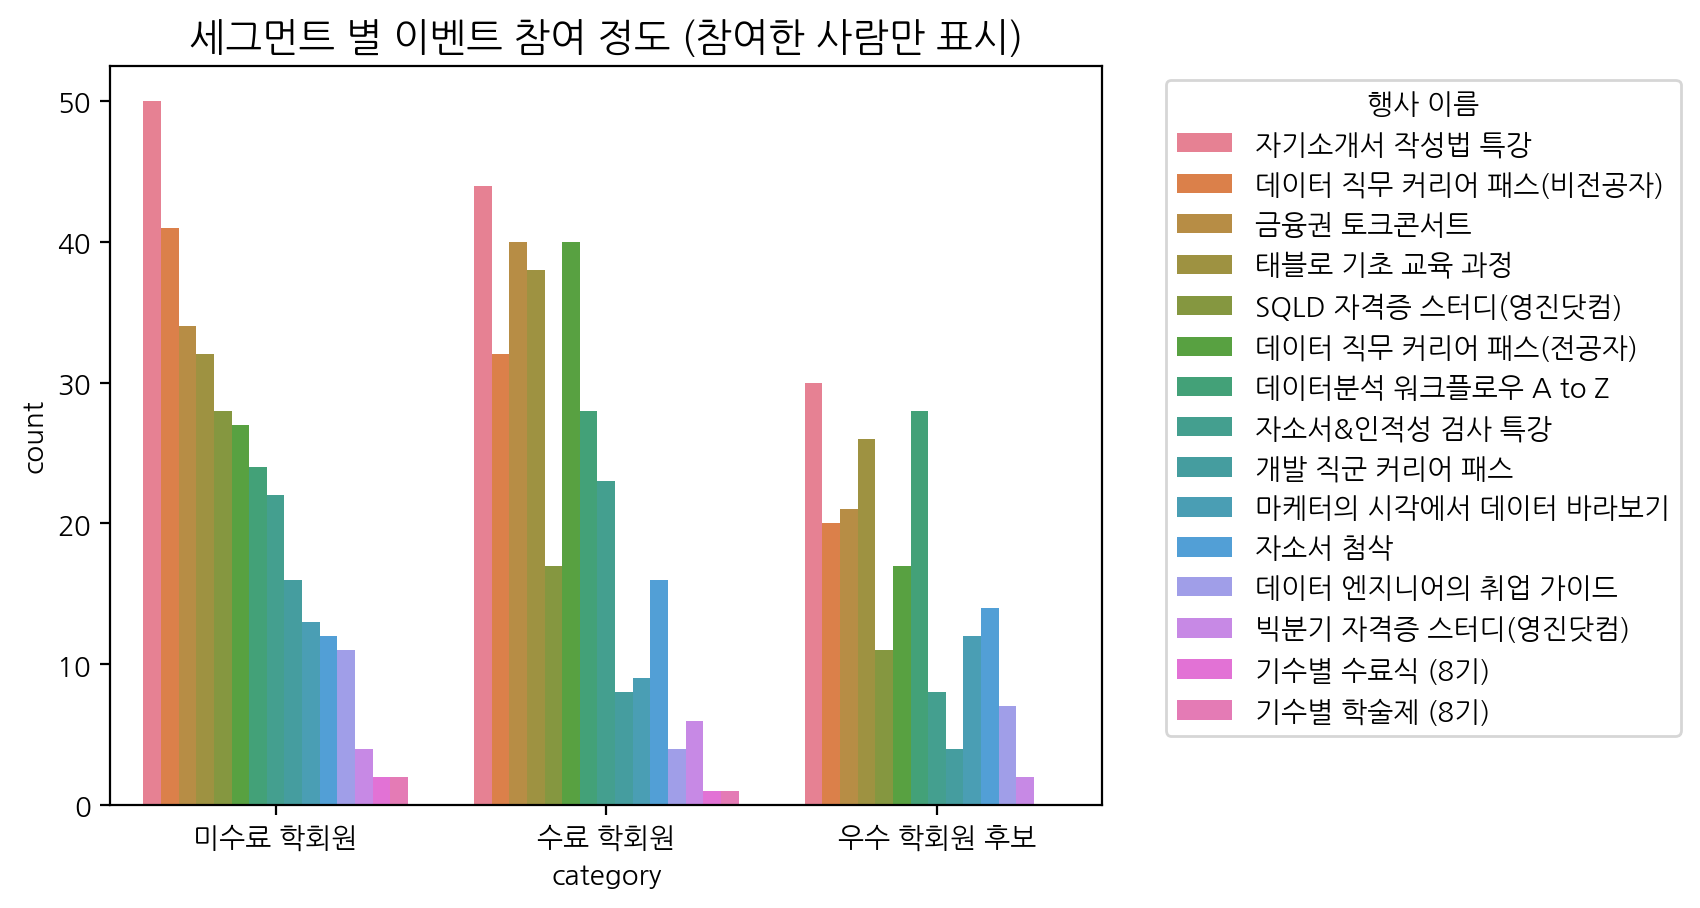

In [163]:
count_df = sat_df_e[sat_df_e['event_name'] != 'X'].groupby('category')['event_name'].value_counts().reset_index()

sns.barplot(x = 'category', y = 'count', hue = 'event_name', data = count_df)
plt.legend(title="행사 이름", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("세그먼트 별 이벤트 참여 정도 (참여한 사람만 표시)", fontsize=14)
plt.show()

- 우수 학회원의 경우 금융권 토크콘서트, 데이터 직무 커리어 패스(비전공자) 이벤트를 다수 참여하였음
- 수료 학회원의 경우 데이터 직무 커리어 패스(전공자), 자기소개서 작성법 특강 이벤트에 다수 참여하였음

### 세그먼트 별 전체적인 학회 점수

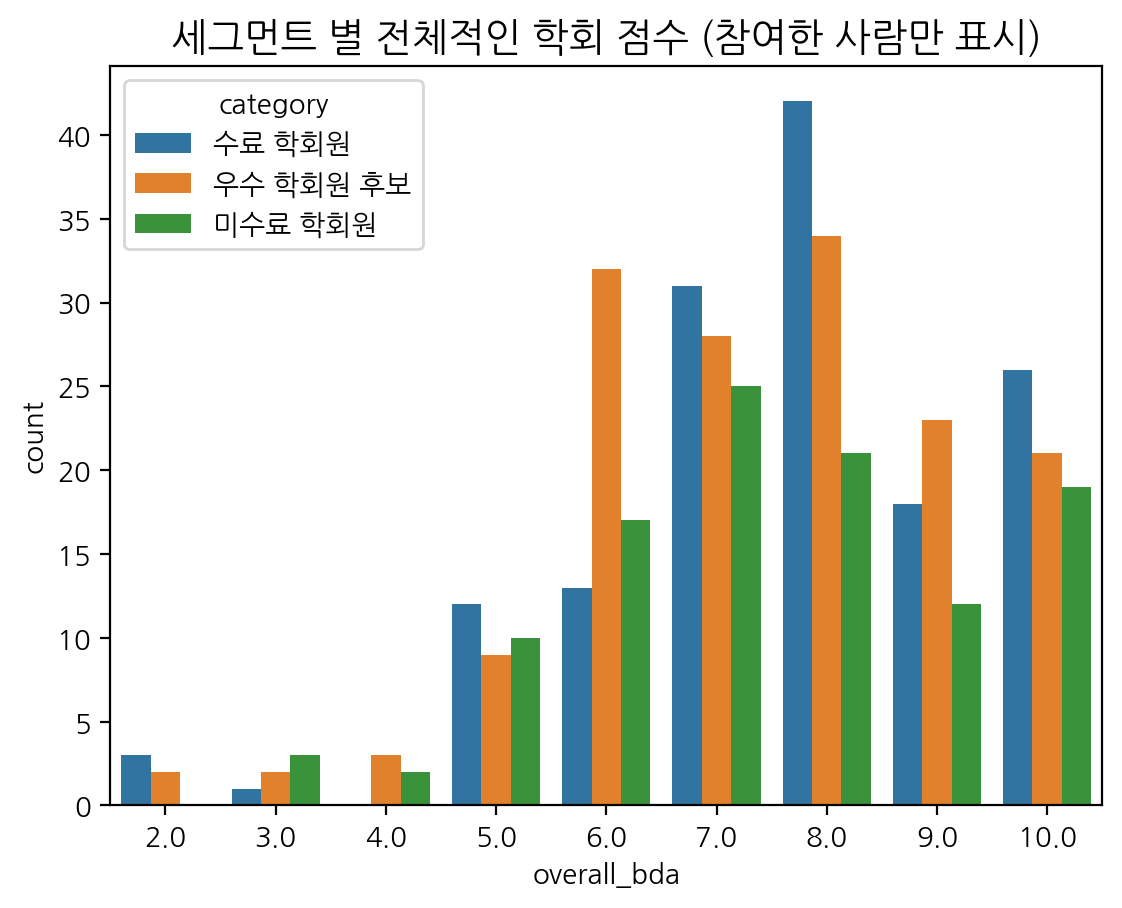

In [164]:
count_df = sat_df_s[sat_df_s['overall_bda'] != 'X'].groupby('category')['overall_bda'].value_counts().reset_index()

sns.barplot(x = 'overall_bda', y = 'count', hue = 'category', data = count_df)
plt.title("세그먼트 별 전체적인 학회 점수 (참여한 사람만 표시)", fontsize=14)
plt.show()

- 학회에 대한 전체적인 만족도는 우수 학회원이 가장 높았음


### 세그먼트 별 학회 운영 점수

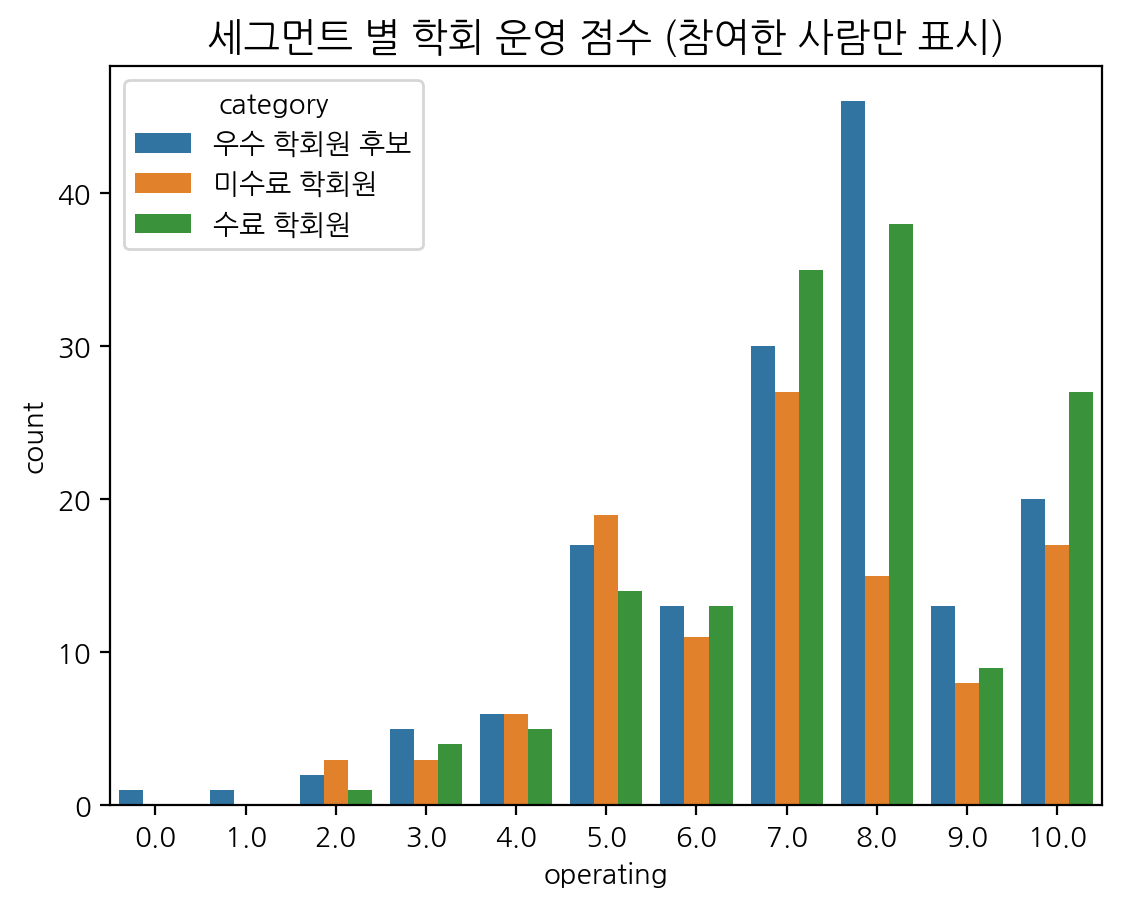

In [165]:
count_df = sat_df_s[sat_df_s['operating'] != 'X'].groupby('category')['operating'].value_counts().reset_index()

sns.barplot(x = 'operating', y = 'count', hue = 'category', data = count_df)
plt.title("세그먼트 별 학회 운영 점수 (참여한 사람만 표시)", fontsize=14)
plt.show()

- 전체적인 학회 점수는 대부분 높았으나 수료하지 못한 학회원들은 학회 운영 점수에 대해 낮은 점수를 부여함

### 세그먼트 별 스터디 점수

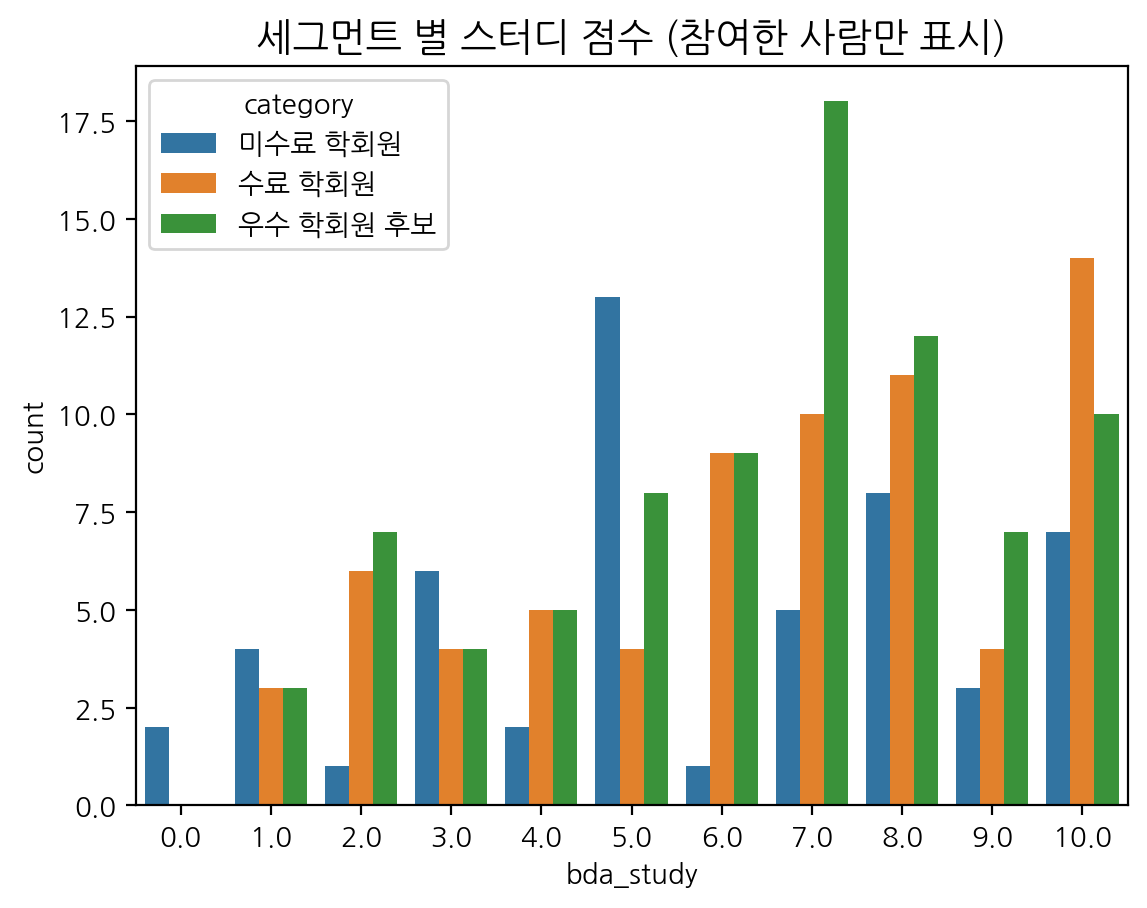

In [166]:
count_df = sat_df_s[sat_df_s['bda_study'] != 'X'].groupby('category')['bda_study'].value_counts().reset_index()

sns.barplot(x = 'bda_study', y = 'count', hue = 'category', data = count_df)
plt.title("세그먼트 별 스터디 점수 (참여한 사람만 표시)", fontsize=14)
plt.show()

- 수료하지 못한 학회원들이 0.0과 1.0과 같이 낮은 점수를 부여한 것을 확인 가능
- 7.0, 8.0, 9.0, 10.0 과 같이 우수 학회원이 스터디에 높은 점수를 부여하였음

### 세그먼트 별 네이버 카페 추천 점수

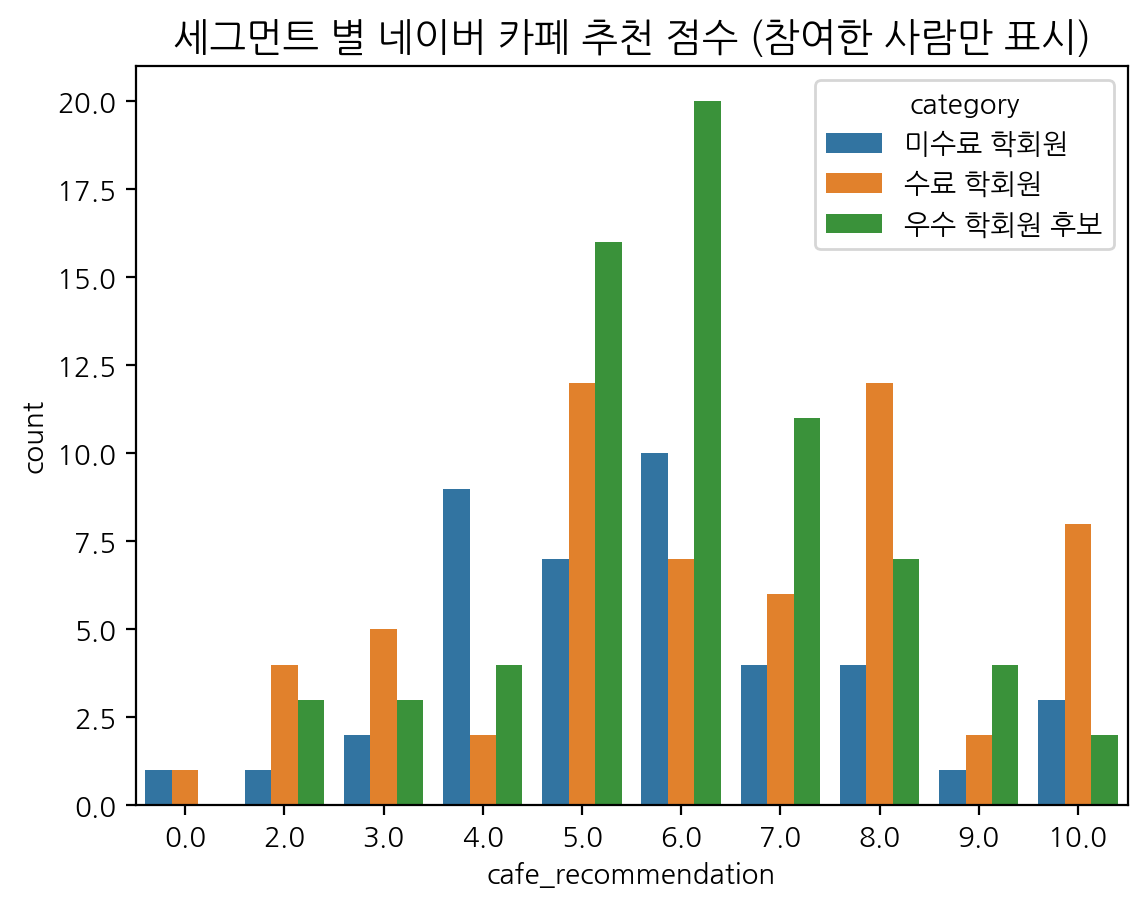

In [167]:
count_df = sat_df_s[sat_df_s['cafe_recommendation'] != 'X'].groupby('category')['cafe_recommendation'].value_counts().reset_index()

sns.barplot(x = 'cafe_recommendation', y = 'count', hue = 'category', data = count_df)
plt.title("세그먼트 별 네이버 카페 추천 점수 (참여한 사람만 표시)", fontsize=14)
plt.show()

- 우수 학회원의 대부분은 6.0 으로 중간 점수를 부여함

### 세그먼트 별 조별활동 점수


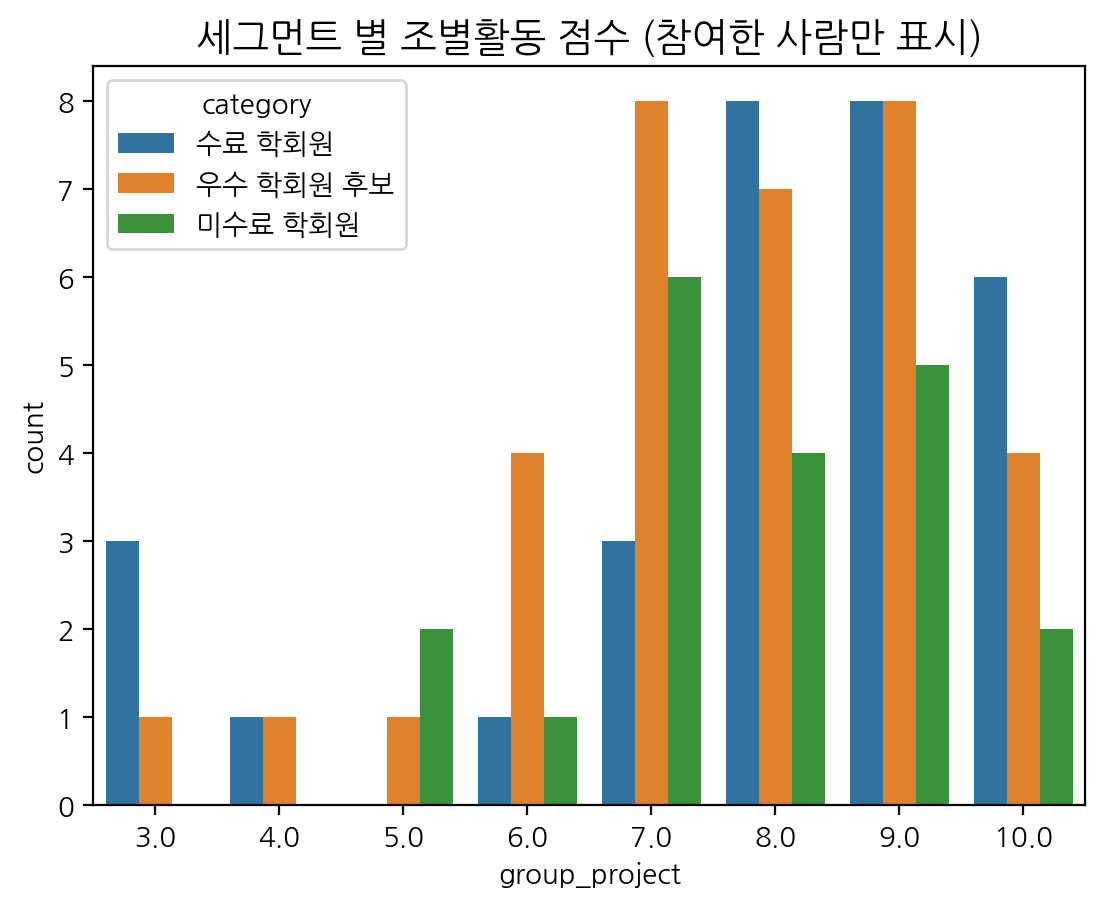

In [168]:
count_df = sat_df_s[sat_df_s['group_project'] != 'X'].groupby('category')['group_project'].value_counts().reset_index()

sns.barplot(x = 'group_project', y = 'count', hue = 'category', data = count_df)
plt.title("세그먼트 별 조별활동 점수 (참여한 사람만 표시)", fontsize=14)
plt.show()

- 조별 활동은 대부분 높은 점수를 부여하였음


## id 중복 피해가 없는 테이블 시각화

```

기존 카테고리 그룹 재정의 후 각 카테고리의 학회원 수 비교
- '우수 + 수료 학회원'과 '미수료 학회원'의 수를 비교하여 두 그룹의 규모를 확인

filtered_job 컬럼의 값을 쉼표로 분리하여 각 카테고리별 직업 개수 시각화
- 각 카테고리에서 어떤 직업이 얼마나 많은지 분석하여 분포를 파악

정수형 데이터를 문자열로 변환 후, 여러 컬럼별 데이터 분포를 시각화하여 카테고리별 비교
- 여러 생활 주기에 걸쳐 데이터 값을 시각화하여 각 카테고리의 특징을 파악하고 비교

카테고리별 주간 평균 값을 선 그래프로 시각화하여 주간 트렌드 분석
- 카테고리별 주가 시계열 데이터를 분석하여 시간이 지남에 따라 변화하는 경향성을 확인

카테고리별 주간 과제 평균 값을 선 그래프로 시각화
- 각 카테고리의 학회원들이 주간 과제에 대해 평균적으로 어떻게 수행했는지 분석

카테고리별 주간 출석 평균 값을 선 그래프로 시각화
- 각 카테고리의 학회원들이 주간 출석에 대해 평균적으로 어떻게 수행했는지 분석

그룹과 카테고리별 주간 출석 평균 값을 선 그래프로 시각화
- 그룹과 카테고리별로 학회원들이 주간 출석에 대해 평균적으로 어떻게 수행했는지 세부적으로 분석

그룹과 카테고리별 주간 과제 평균 값을 선 그래프로 시각화
- 그룹과 카테고리별로 학회원들이 주간 과제에 대해 평균적으로 어떻게 수행했는지 세부적으로 분석
```

### 기존 카테고리 그룹 재정의 및 그룹 시각화

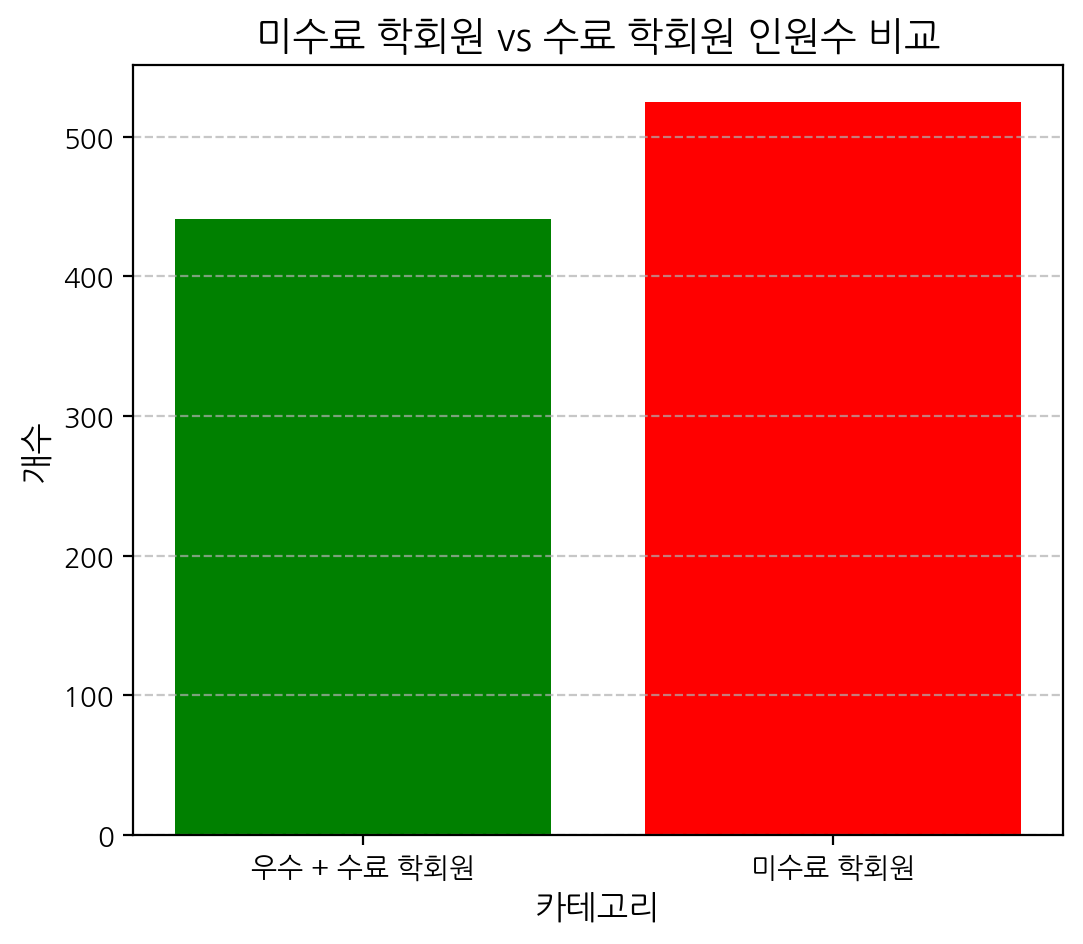

In [169]:
# 기존 카테고리 그룹 재정의
comparison_counts = {
    "우수 + 수료 학회원": total_df_X[total_df_X["category"].isin(["우수 학회원 후보", "수료 학회원"])].shape[0],
    "미수료 학회원": total_df_X[total_df_X["category"] == "미수료 학회원"].shape[0]
}

# 데이터 시각화
plt.figure(figsize=(6, 5))
plt.bar(comparison_counts.keys(), comparison_counts.values(), color=['green', 'red'])

plt.xlabel("카테고리", fontsize=12)
plt.ylabel("개수", fontsize=12)
plt.title("미수료 학회원 vs 수료 학회원 인원수 비교", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 그래프 출력
plt.show()

### 희망 직업 분포 시각화

<Figure size 1200x600 with 0 Axes>

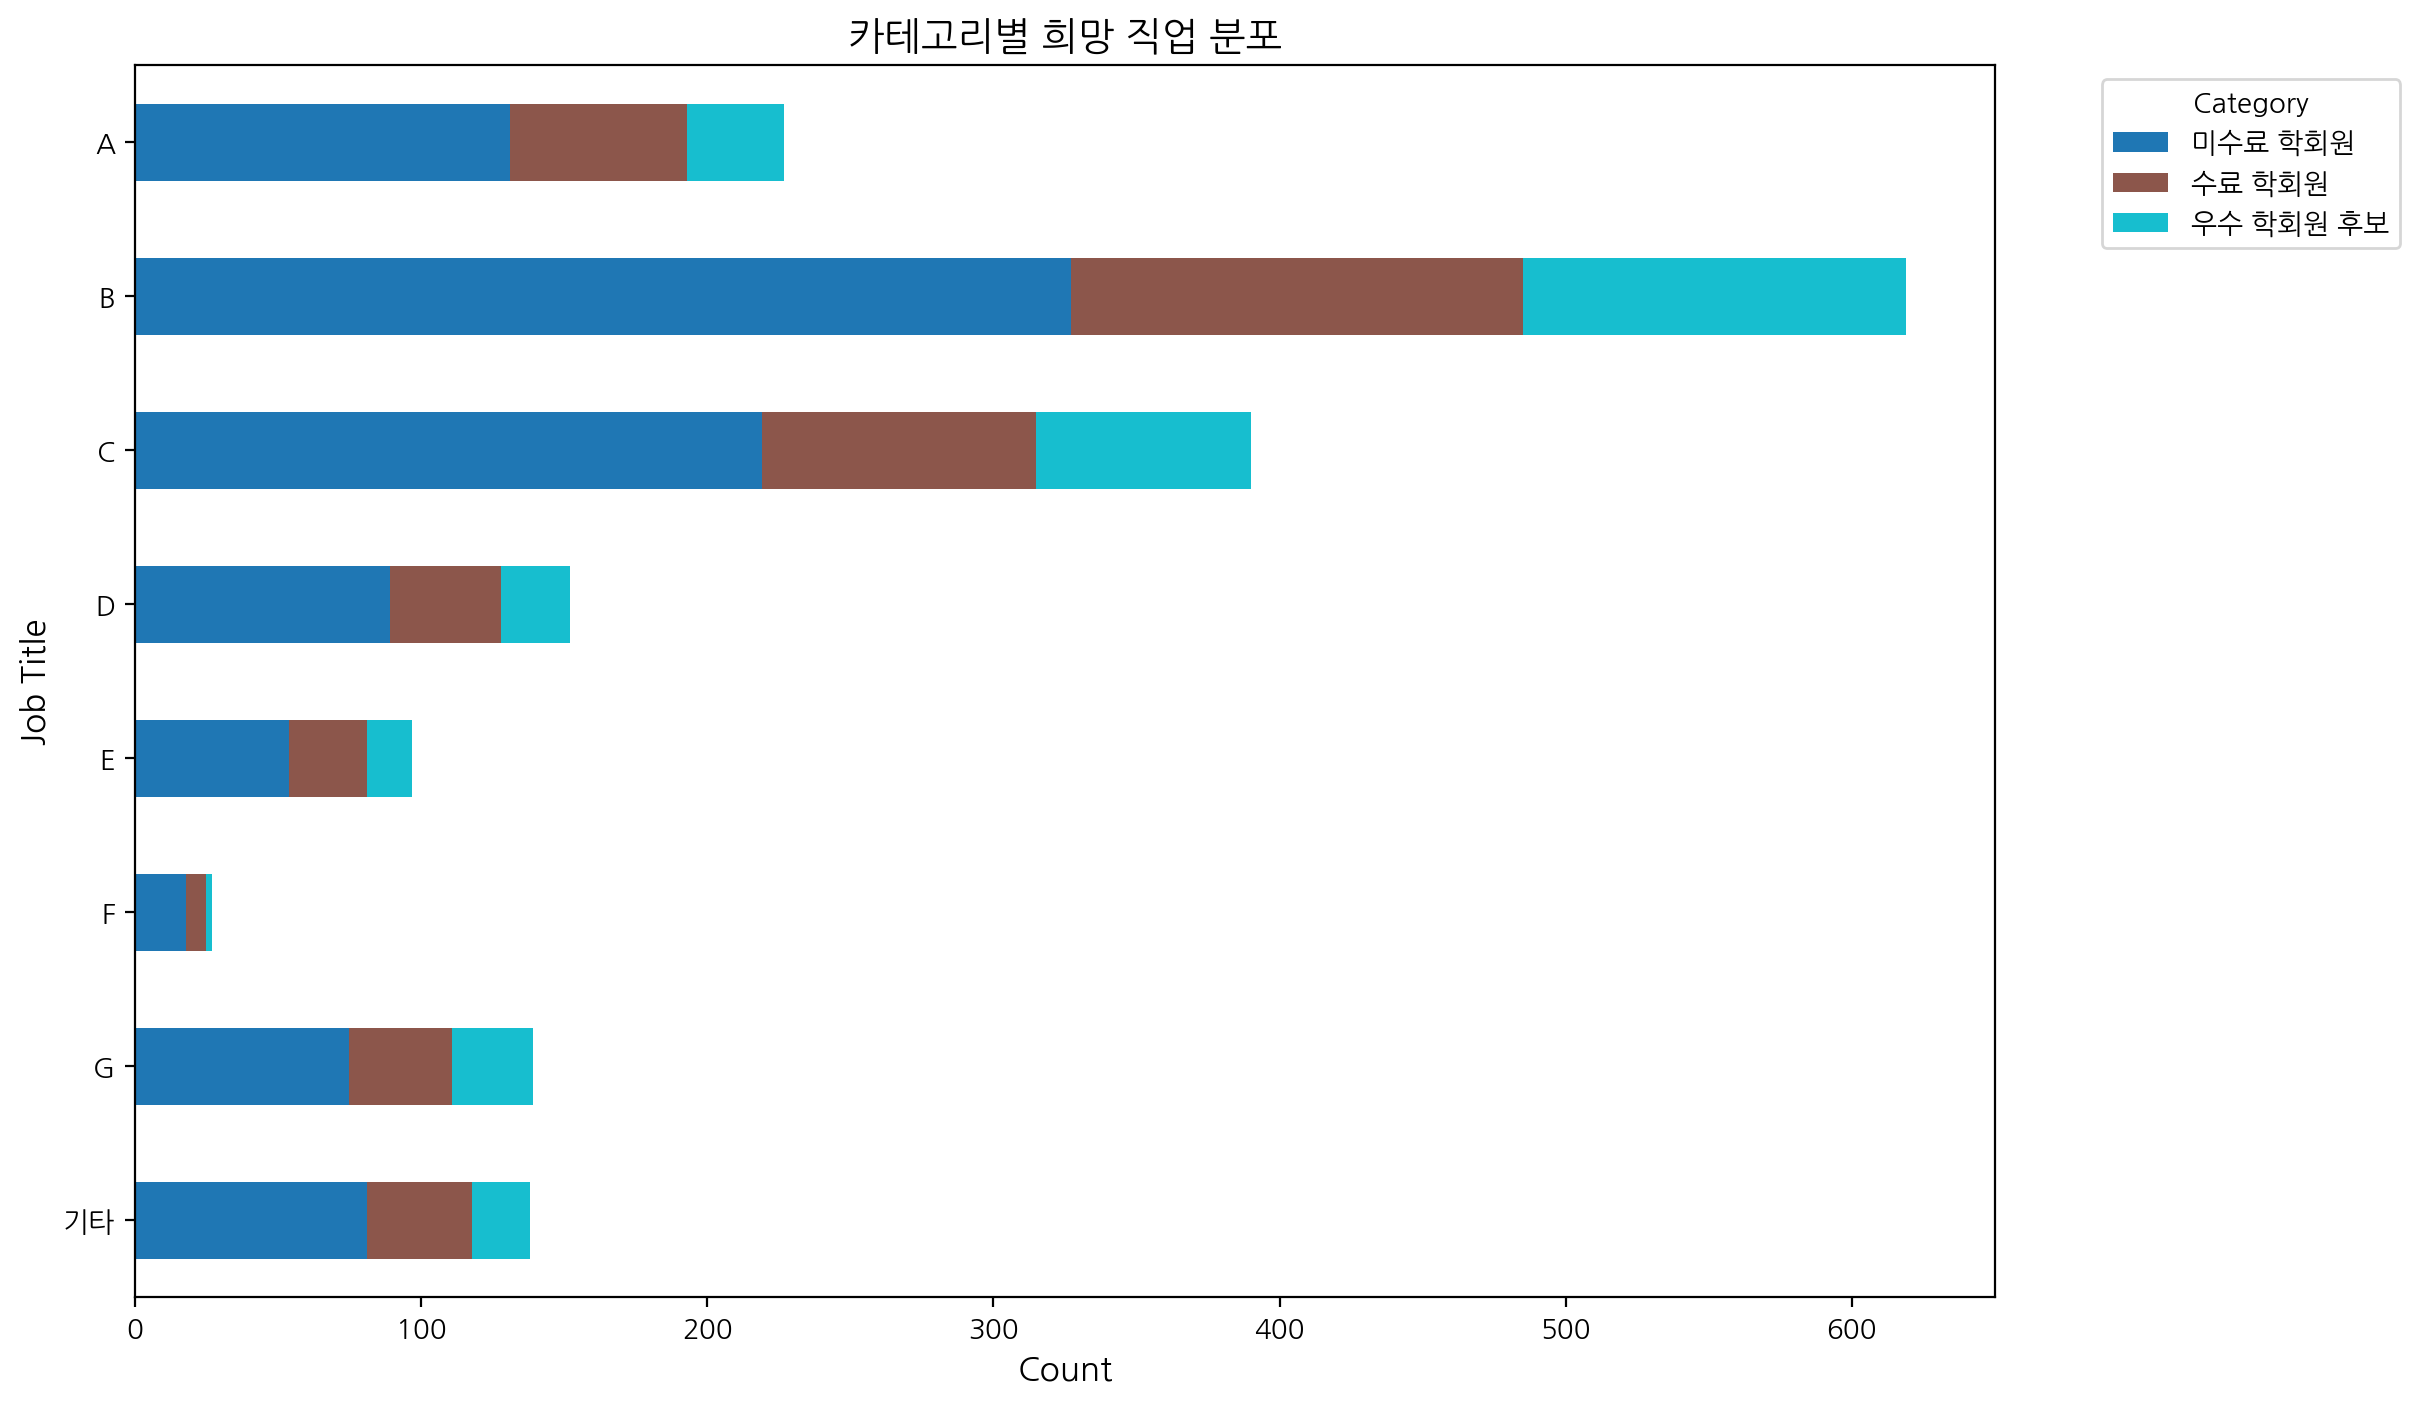

In [170]:
# 쉼표(,) 기준으로 filtered_job 값 분리 후 개별 단어 추출
total_df_X_exploded = total_df_X.assign(filtered_job=total_df_X['filtered_job'].str.split(','))
total_df_X_exploded = total_df_X_exploded.explode('filtered_job')
total_df_X_exploded['filtered_job'] = total_df_X_exploded['filtered_job'].str.strip()

# category별 filtered_job 개수 계산
category_job_counts = total_df_X_exploded.groupby('category')['filtered_job'].value_counts().unstack().fillna(0)

# 시각화
plt.figure(figsize=(12, 6))
category_job_counts.T.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='tab10')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Job Title", fontsize=12)
plt.title("카테고리별 희망 직업 분포", fontsize=14)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().invert_yaxis()
plt.show()

시각화를 위하여 int형을 str형으로 변환

In [171]:
int_num = ['week3_x', 'week4_x',
       'week5_x', 'week6_x', 'week7_x', 'week8_x', 'week9_x', 'week10',
       'week2', 'week3_y', 'week4_y', 'week5_y', 'week6_y', 'week7_y',
       'week8_y', 'week9_y']
for col in int_num:
    total_df_X[col] = total_df_X[col].astype(str)

### 세그먼트별로 컬럼당 인원 분포 조사

In [172]:
# ID 컬럼 제외하고 모든 컬럼 가져오기
excluded_columns = ["id", "category", "filtered_job"]  # 제외할 컬럼 리스트
columns_to_plot = [col for col in total_df_X.columns if col not in excluded_columns]

# 전체 최대값 찾기 (x축 크기 통일)
max_x_limit = 0

# 각 컬럼별 데이터 개수 계산 (최대값 찾기)
counts_dict = {}
for col in columns_to_plot:
    counts_df = total_df_X.groupby("category")[col].value_counts().unstack()
    counts_dict[col] = counts_df
    max_x_limit = max(max_x_limit, counts_df.sum(axis=1).max())  # 최대값 업데이트

# x축 최대값 설정 (최대값 기준으로 1.2배 여유)
max_x_limit *= 1.2

# 서브플롯 생성 (한 행에 하나씩, 더 넓고 높이 조정)
fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(18, 5 * len(columns_to_plot)))

# 각 컬럼별로 시각화
for i, col in enumerate(columns_to_plot):
    counts_df = counts_dict[col]

    # 가로형 막대 그래프 생성 (category 구분, 막대 두께 조정)
    counts_df.plot(kind='barh', stacked=True, ax=axes[i], width=0.6)

    # 제목 설정
    axes[i].set_title(f"{col} (세그먼트별 분포)", fontsize=16, pad=15)
    axes[i].set_xlabel("Count", fontsize=14)
    axes[i].set_ylabel(col, fontsize=14)

    # x축 최대값을 고정하여 그래프가 꽉 차지 않도록 설정
    axes[i].set_xlim(0, max_x_limit)

# 서브플롯 간 간격 조정 (간격 더 넓힘)
plt.subplots_adjust(hspace=1.2)

# 범례 추가 (공통)
axes[0].legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 출력
plt.show()

str형을 int형으로 변환

In [173]:
int_num = ['week3_x', 'week4_x',
       'week5_x', 'week6_x', 'week7_x', 'week8_x', 'week9_x', 'week10',
       'week2', 'week3_y', 'week4_y', 'week5_y', 'week6_y', 'week7_y',
       'week8_y', 'week9_y']
for col in int_num:
    total_df_X[col] = total_df_X[col].astype(int)

### 세그먼트 별 강의 참여율 평균 조사

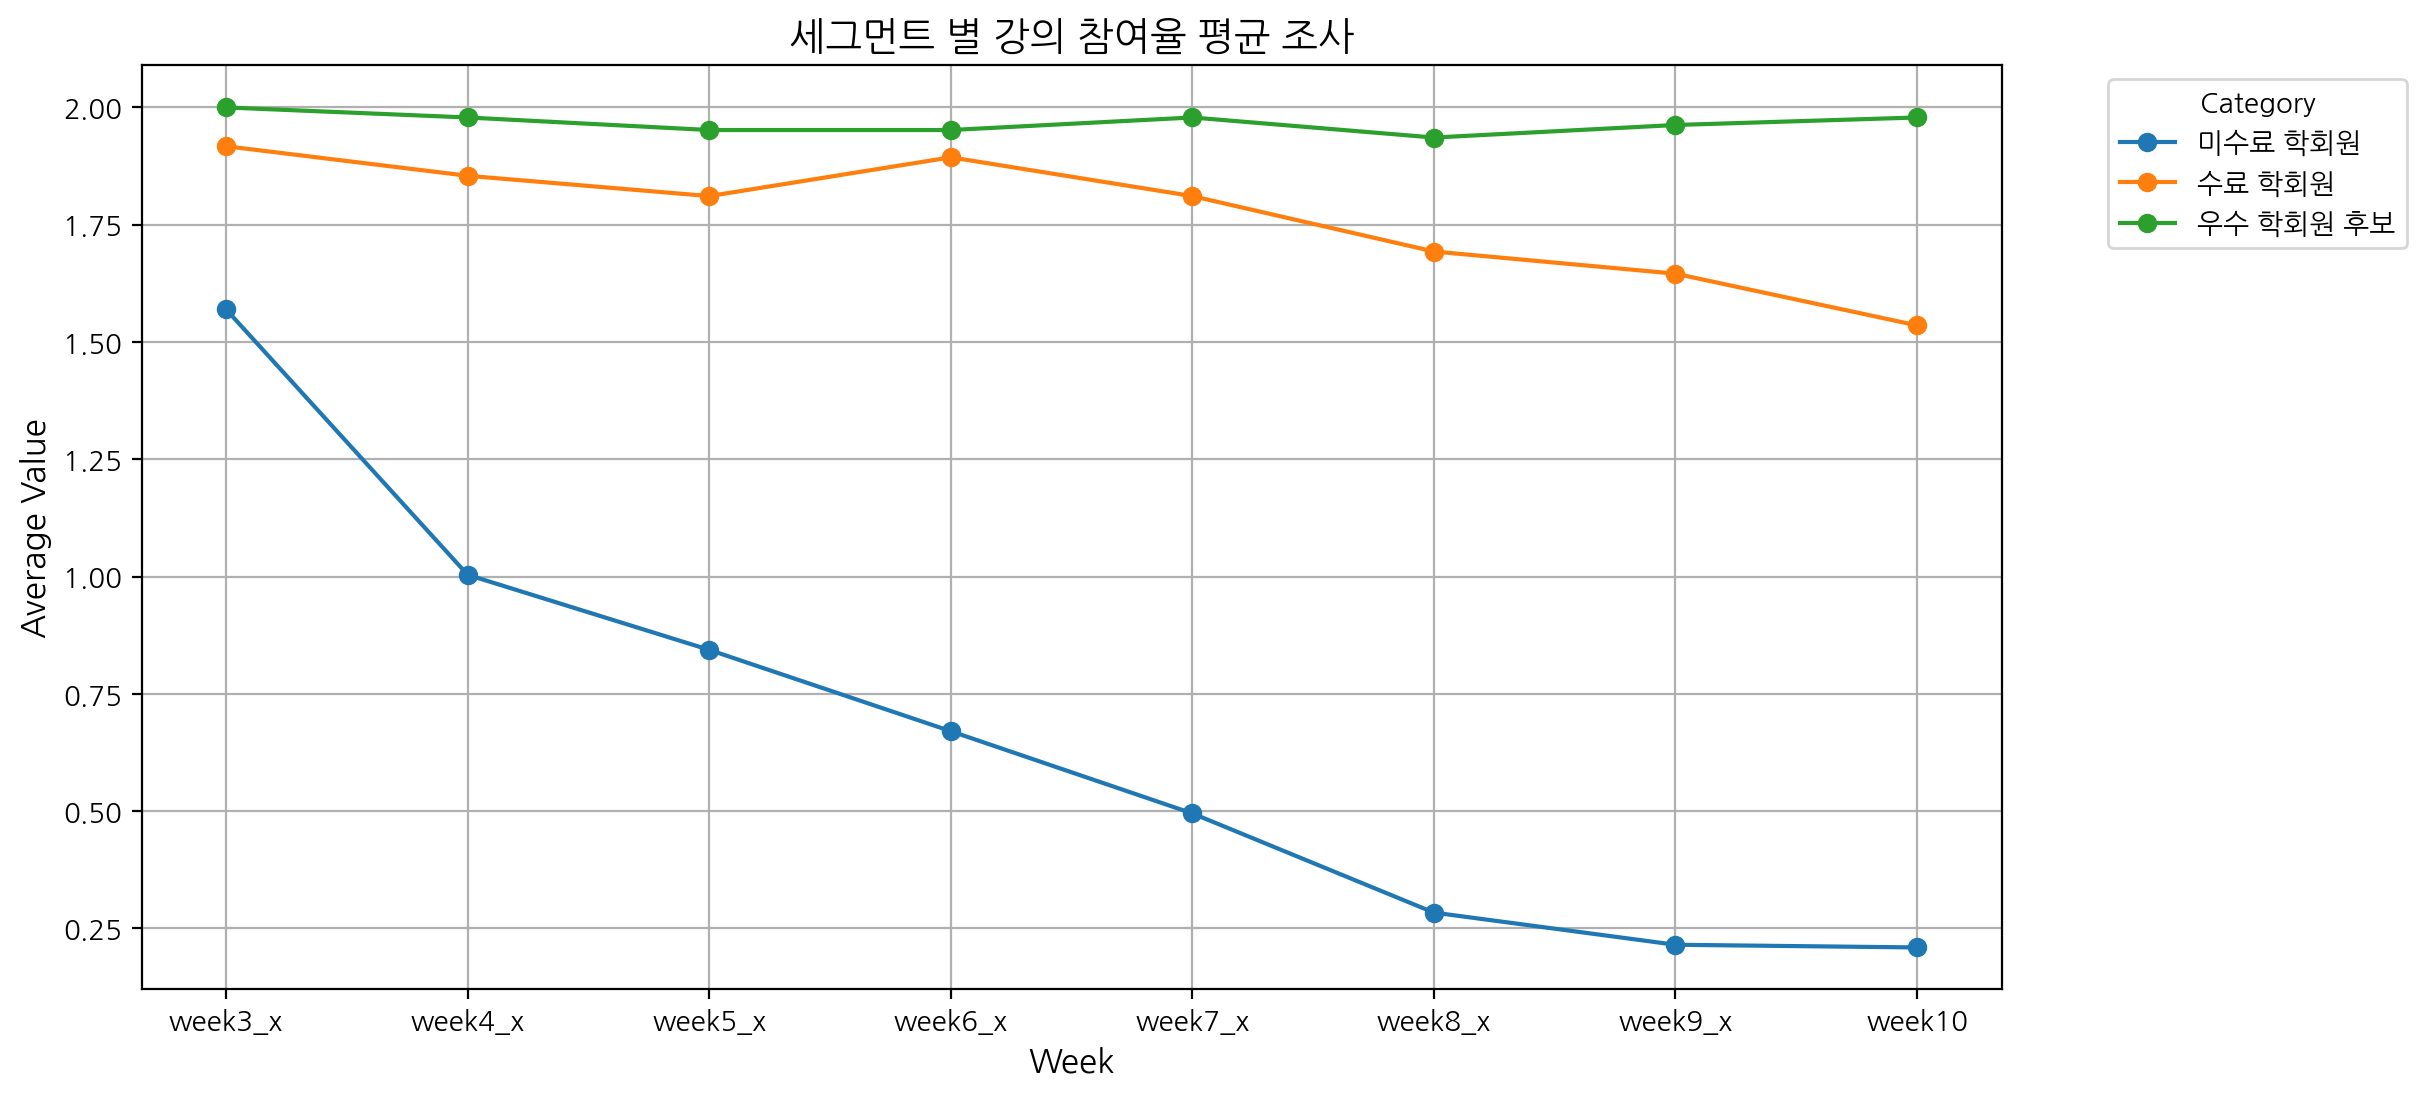

In [174]:
time_columns = ['week3_x', 'week4_x', 'week5_x', 'week6_x', 'week7_x', 'week8_x', 'week9_x', 'week10']
category_weekly_avg = total_df_X.groupby('category')[time_columns].mean()

plt.figure(figsize=(12, 6))
for category in category_weekly_avg.index:
    plt.plot(time_columns, category_weekly_avg.loc[category], marker='o', label=category)

plt.xlabel("Week", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.title("세그먼트 별 강의 참여율 평균 조사", fontsize=14)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

### 세그먼트 별 과제 제출률 평균 조사

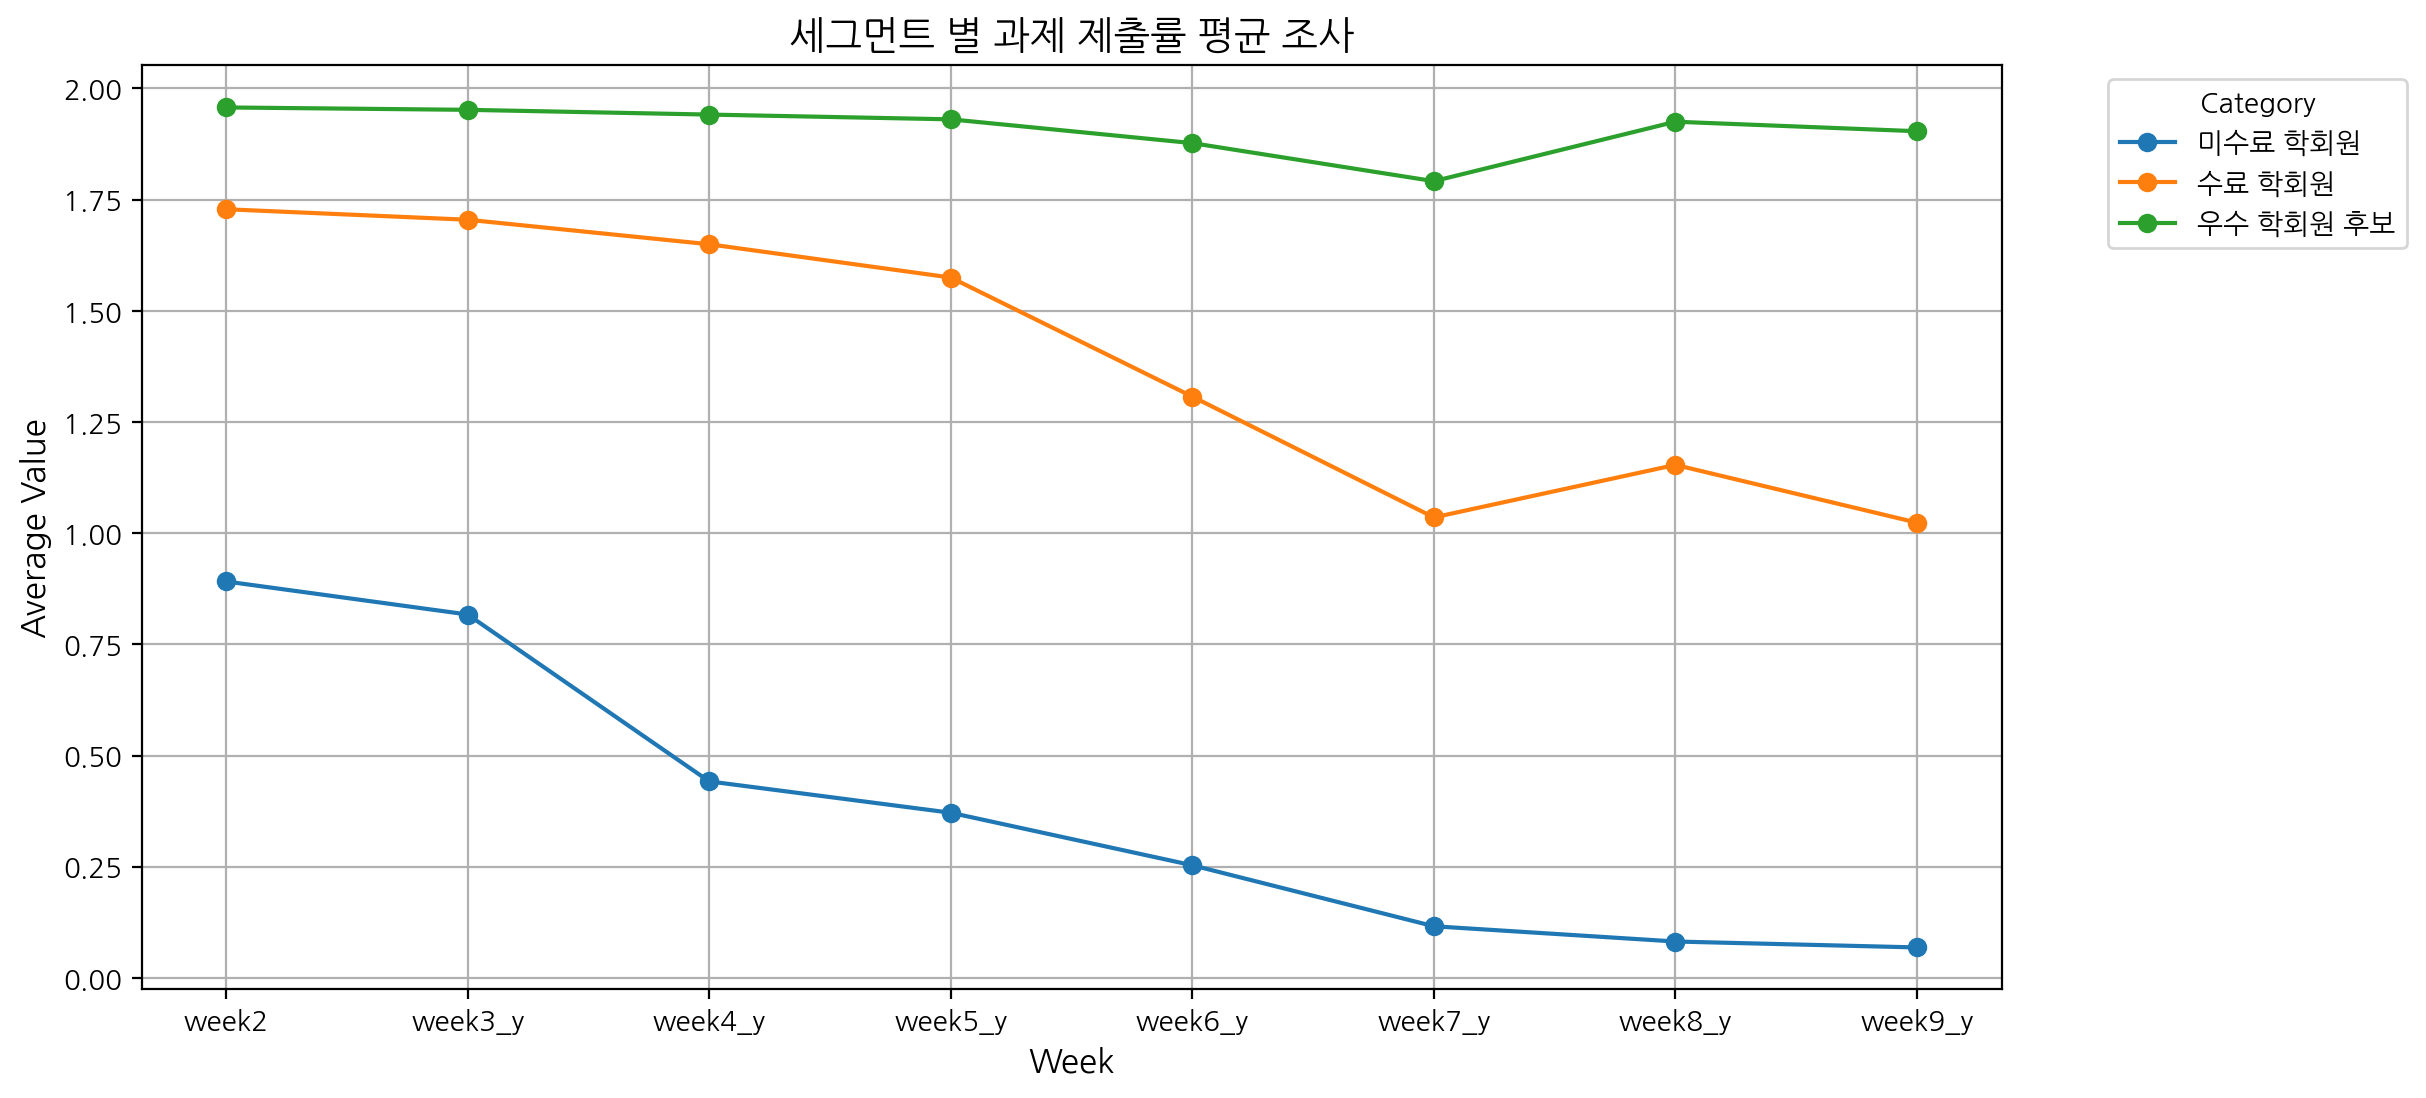

In [175]:
time_columns = ['week2', 'week3_y', 'week4_y', 'week5_y', 'week6_y', 'week7_y', 'week8_y', 'week9_y']
category_weekly_avg = total_df_X.groupby('category')[time_columns].mean()

plt.figure(figsize=(12, 6))
for category in category_weekly_avg.index:
    plt.plot(time_columns, category_weekly_avg.loc[category], marker='o', label=category)

plt.xlabel("Week", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.title("세그먼트 별 과제 제출률 평균 조사", fontsize=14)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

### 조별 활동 참여 여부별, 세그먼트별 강의 참여율 조사

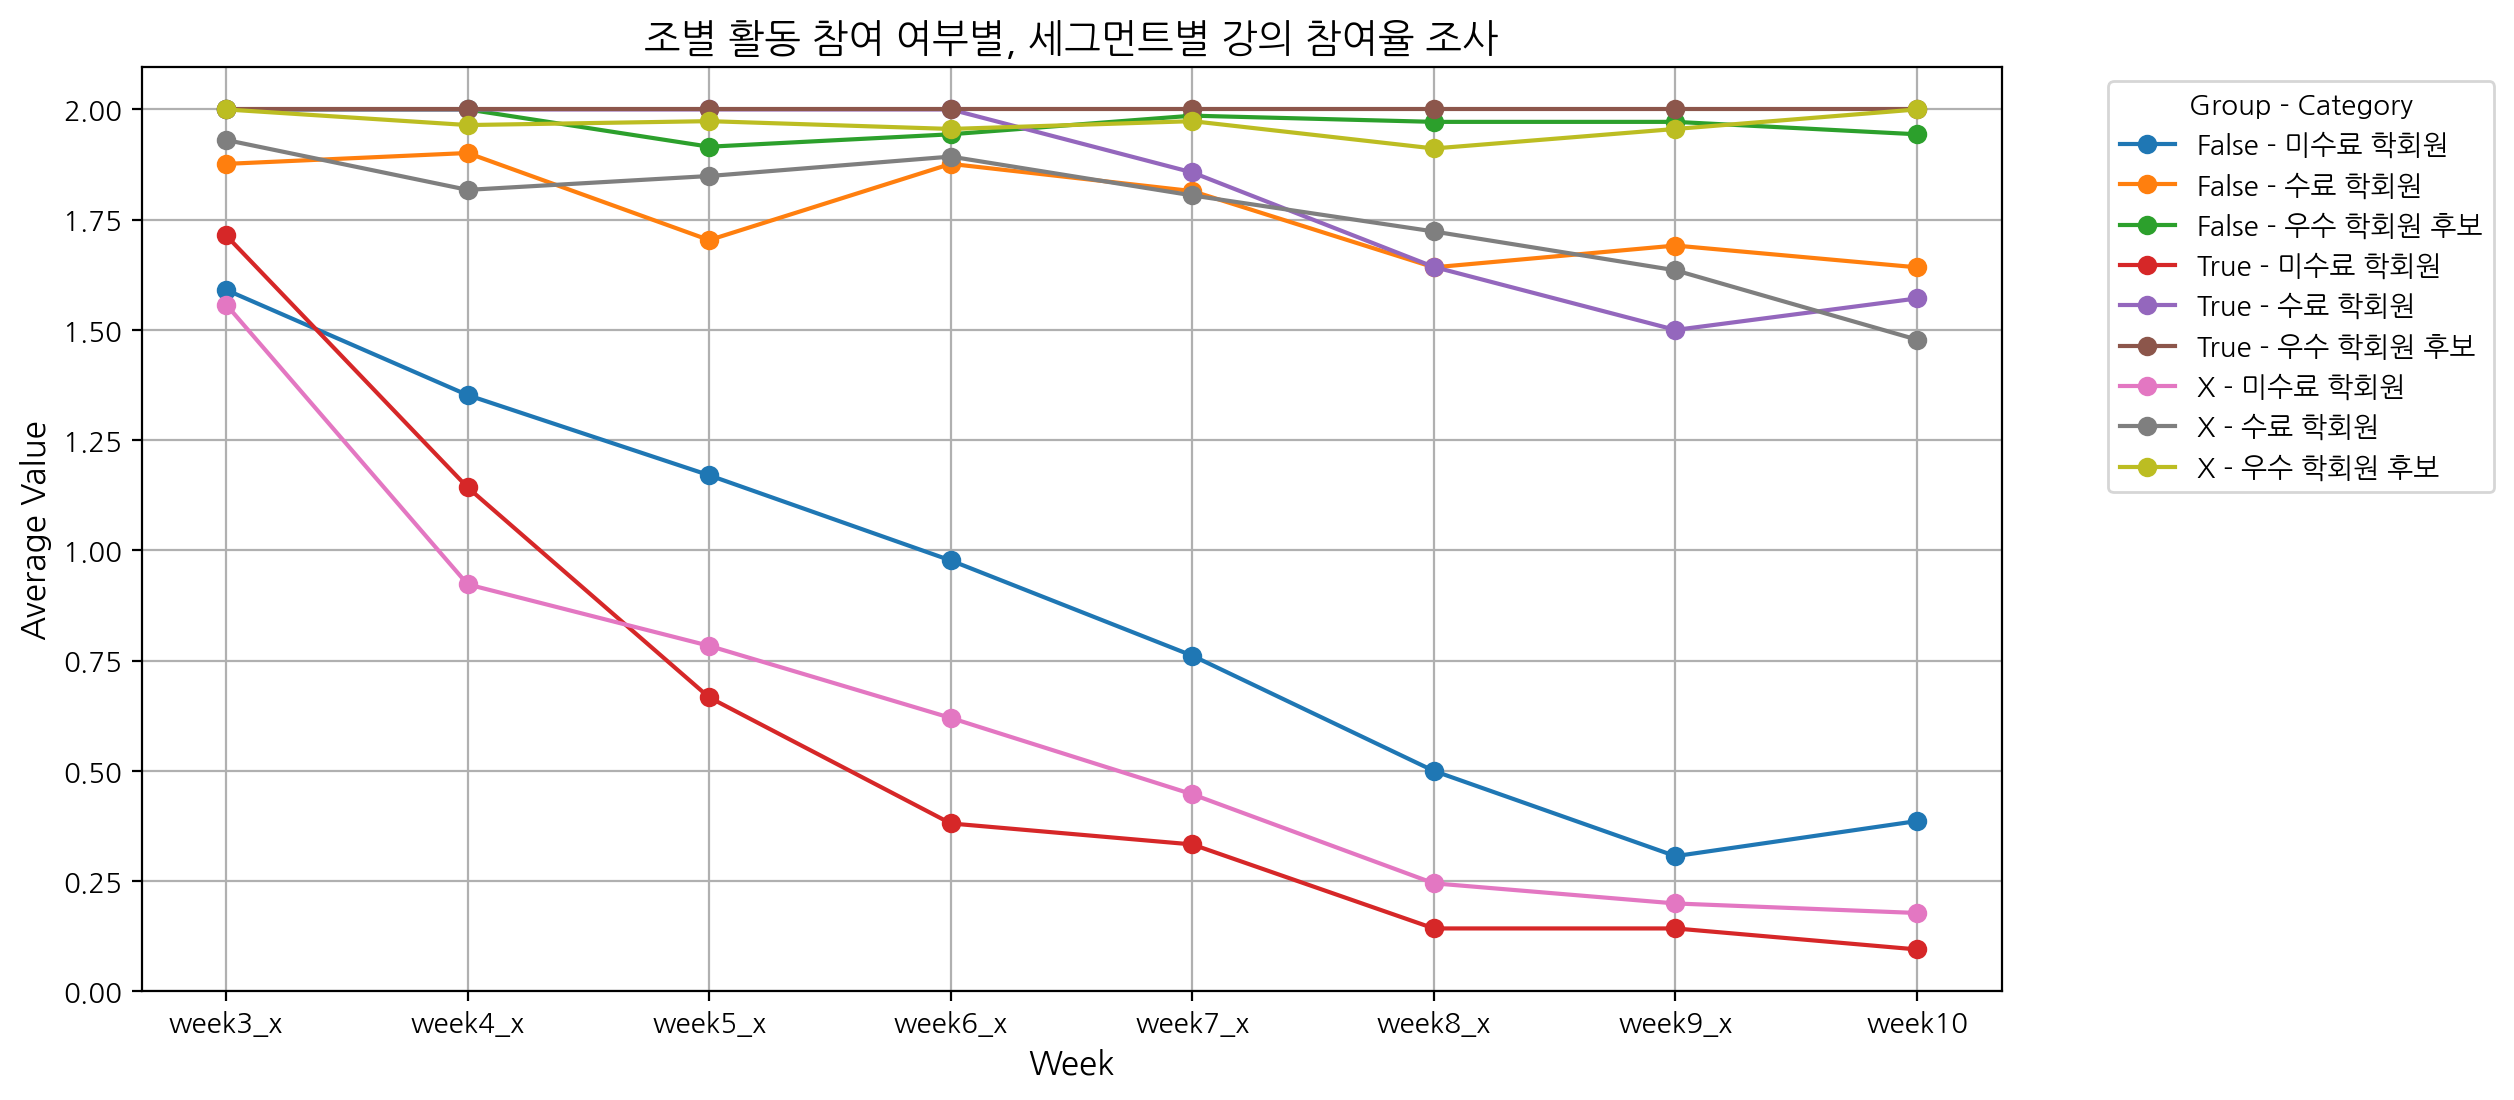

In [176]:
# 데이터 준비
time_columns = ['week3_x', 'week4_x', 'week5_x', 'week6_x', 'week7_x', 'week8_x', 'week9_x', 'week10']
group_category_weekly_avg = total_df_X.groupby(['group_leave', 'category'])[time_columns].mean()

# 시각화
plt.figure(figsize=(12, 6))
for (group_leave, category), values in group_category_weekly_avg.iterrows():
    plt.plot(time_columns, values, marker='o', label=f"{group_leave} - {category}")

plt.xlabel("Week", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.title("조별 활동 참여 여부별, 세그먼트별 강의 참여율 조사", fontsize=14)
plt.legend(title="Group - Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

### 조별 활동 참여 여부별, 세그먼트별 과제 제출률 조사

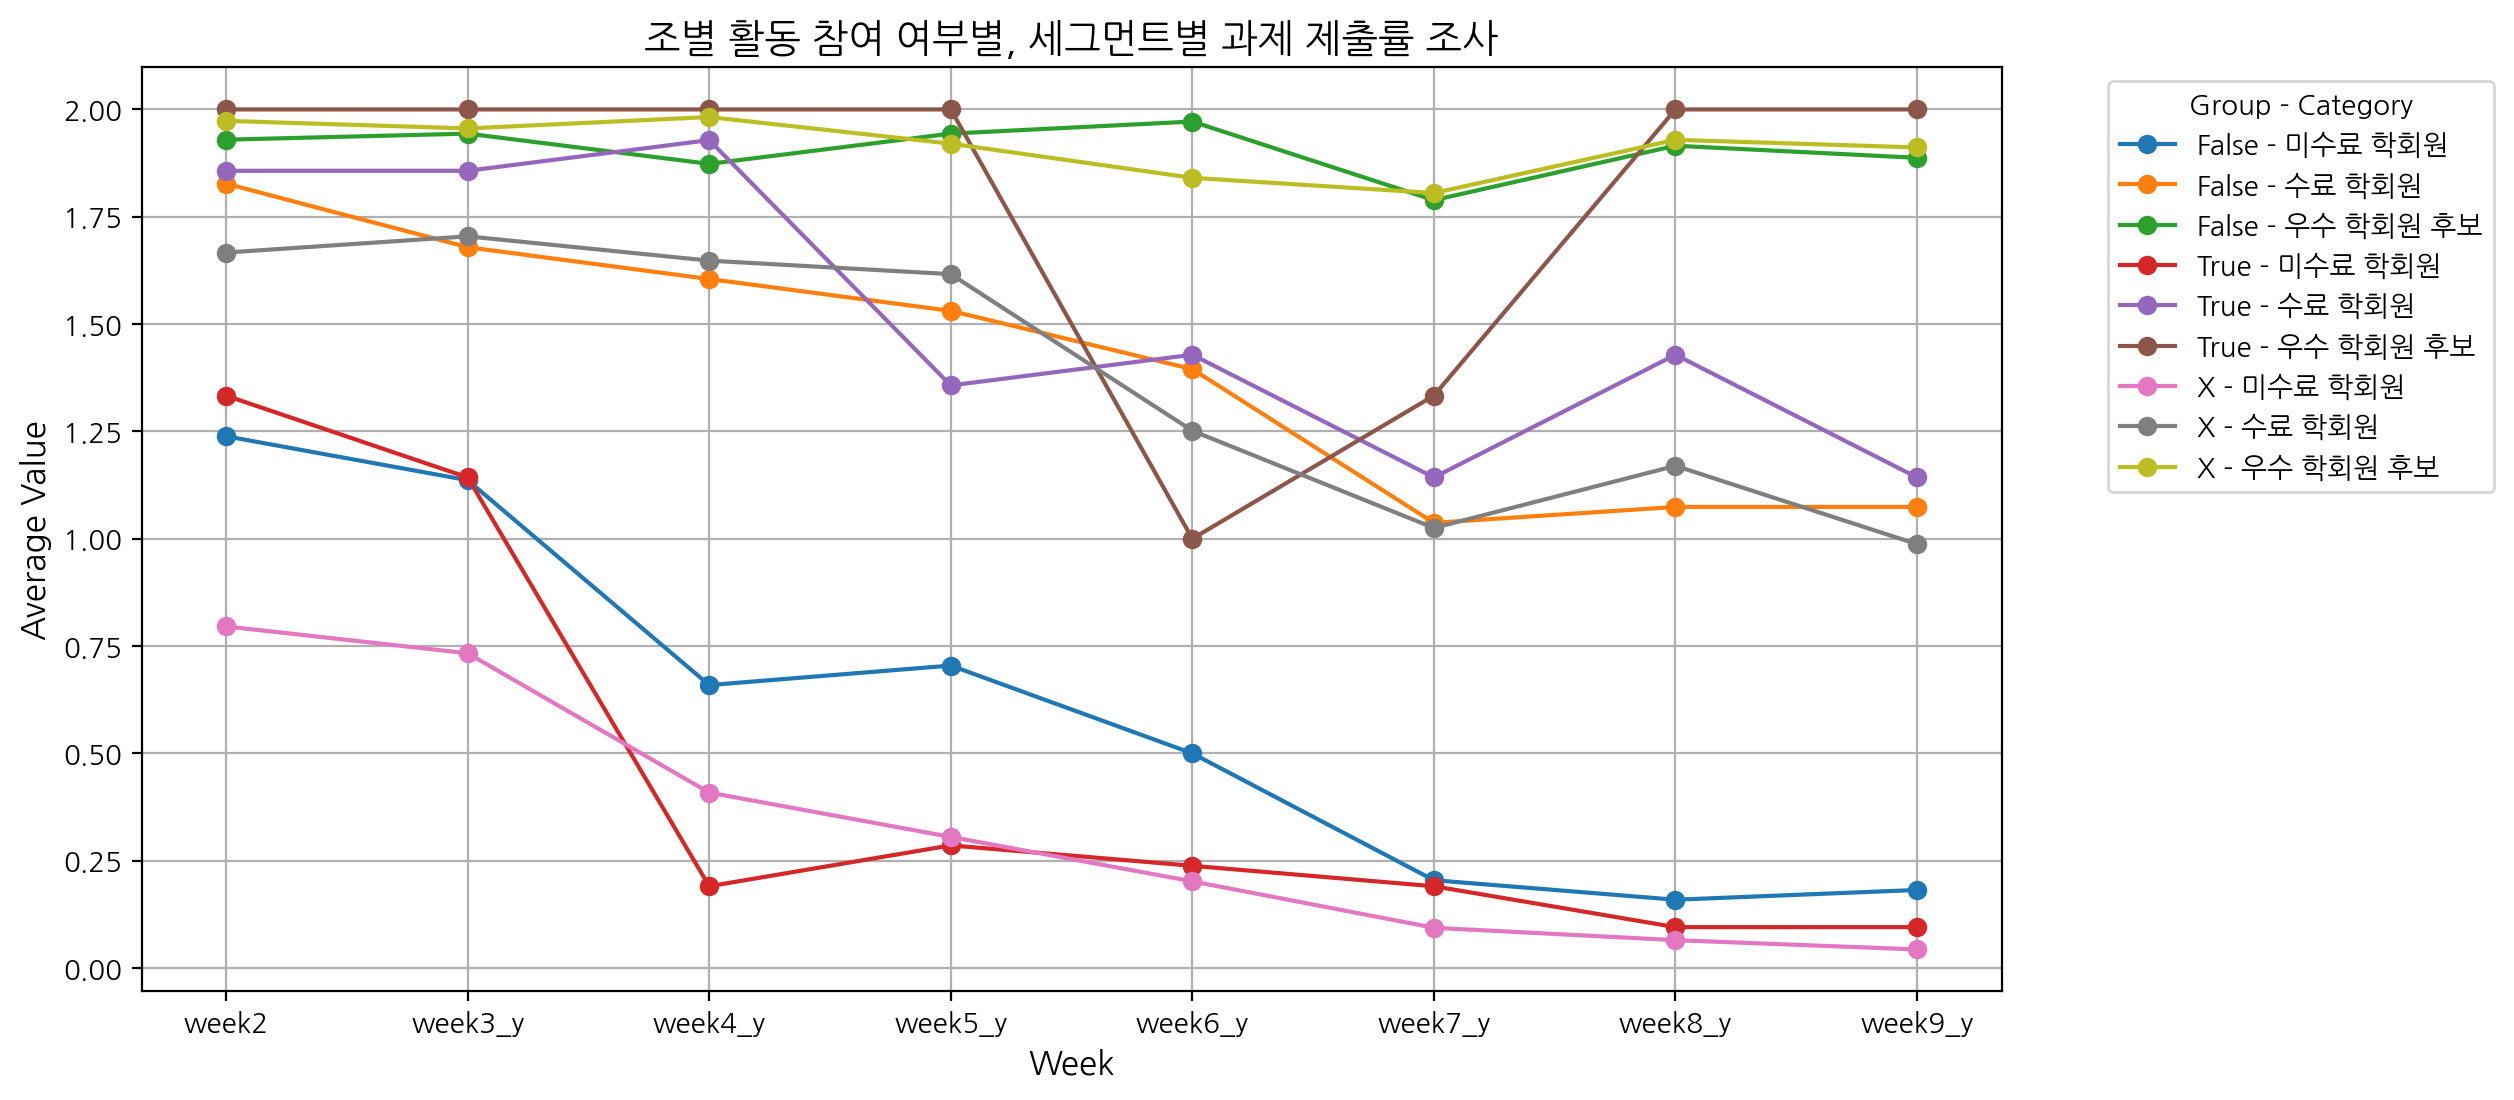

In [177]:
# 데이터 준비
time_columns = ['week2', 'week3_y', 'week4_y', 'week5_y',
                      'week6_y', 'week7_y', 'week8_y', 'week9_y']
group_category_weekly_avg = total_df_X.groupby(['group_leave', 'category'])[time_columns].mean()

# 시각화
plt.figure(figsize=(12, 6))
for (group_leave, category), values in group_category_weekly_avg.iterrows():
    plt.plot(time_columns, values, marker='o', label=f"{group_leave} - {category}")

plt.xlabel("Week", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.title("조별 활동 참여 여부별, 세그먼트별 과제 제출률 조사", fontsize=14)
plt.legend(title="Group - Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

## 상관분석

In [178]:
# 수료 학회원, 미수료 학회원 구분
total_df_X['completion'] = total_df_X['category'].apply(lambda x: 0 if x == '미수료 학회원' else 1)

### 조별활동과 수료율 상관관계 분석

/tmp/ipython-input-179-897447882.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['on_offline'] = encoder.fit_transform(corr_df['on_offline'].astype(str))
/tmp/ipython-input-179-897447882.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df[other_categorical_cols] = corr_df[other_categorical_cols].apply(lambda col: LabelEncoder().fit_transform(col.astype(str)))


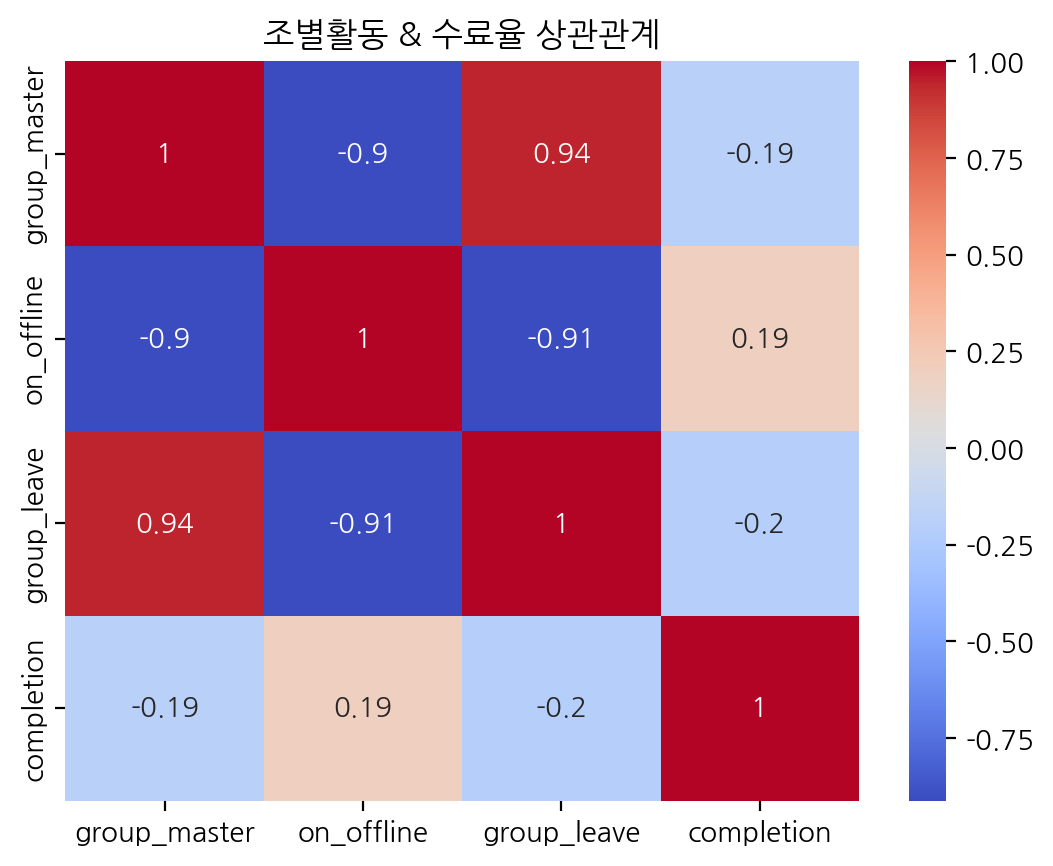

In [179]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
corr_df = total_df_X[['group_master', 'on_offline', 'group_leave','completion']]

# 특정 컬럼 (on_offline)만 Label Encoding 적용
corr_df['on_offline'] = encoder.fit_transform(corr_df['on_offline'].astype(str))

# on_offline 컬럼의 매핑 확인
on_offline_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# 나머지 범주형 컬럼 Label Encoding 적용 (on_offline 제외)
other_categorical_cols = corr_df.select_dtypes(include=['object']).columns.difference(['on_offline'])
corr_df[other_categorical_cols] = corr_df[other_categorical_cols].apply(lambda col: LabelEncoder().fit_transform(col.astype(str)))

# 피어슨 상관계수 계산
pearson_corr = corr_df.corr(method='pearson')

sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title('조별활동 & 수료율 상관관계')
plt.show()

### 상점과 수료율 상관관계

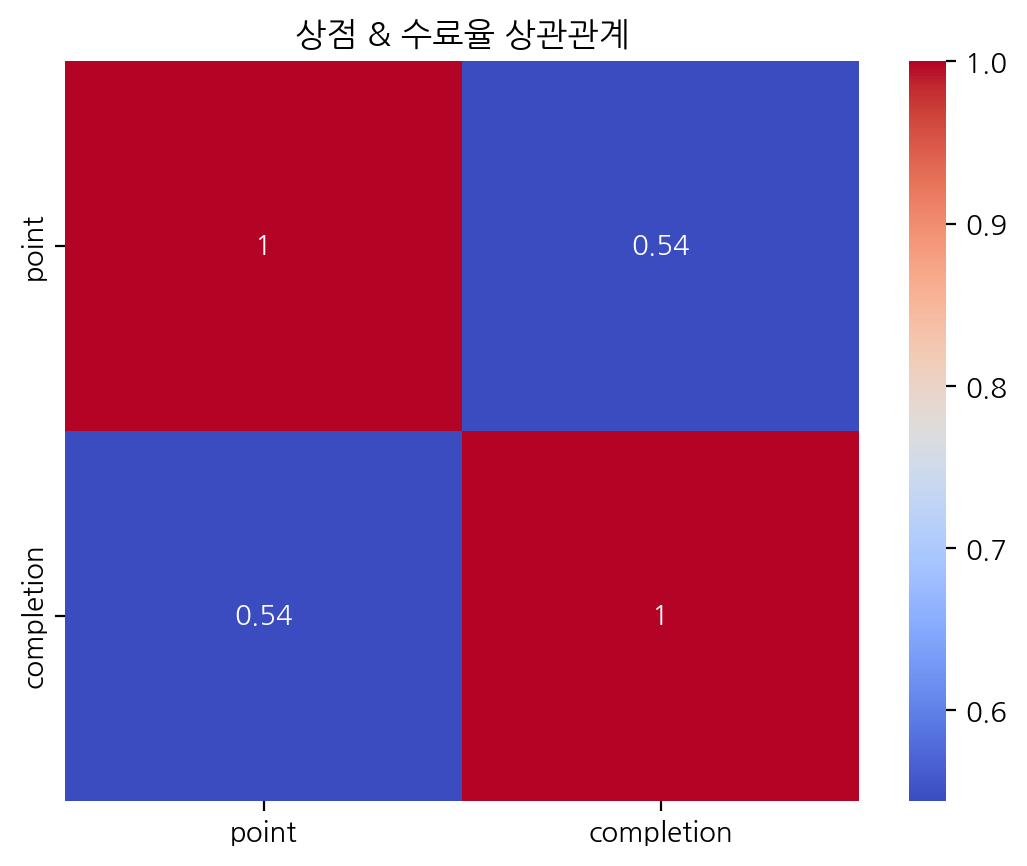

In [180]:
corr_point = total_df_X[['point', 'completion']]

# 피어슨 상관계수 계산
pearson_corr = corr_point.corr(method='pearson')

sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title('상점 & 수료율 상관관계')
plt.show()

### 미수료가 확정되는 시기 계산 과정

/tmp/ipython-input-181-1504808510.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exceed_column'] = cumulative_score.apply(find_exceed_column, axis=1)
/tmp/ipython-input-181-1504808510.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=exceed_counts.index, y=exceed_counts.values, palette="viridis")


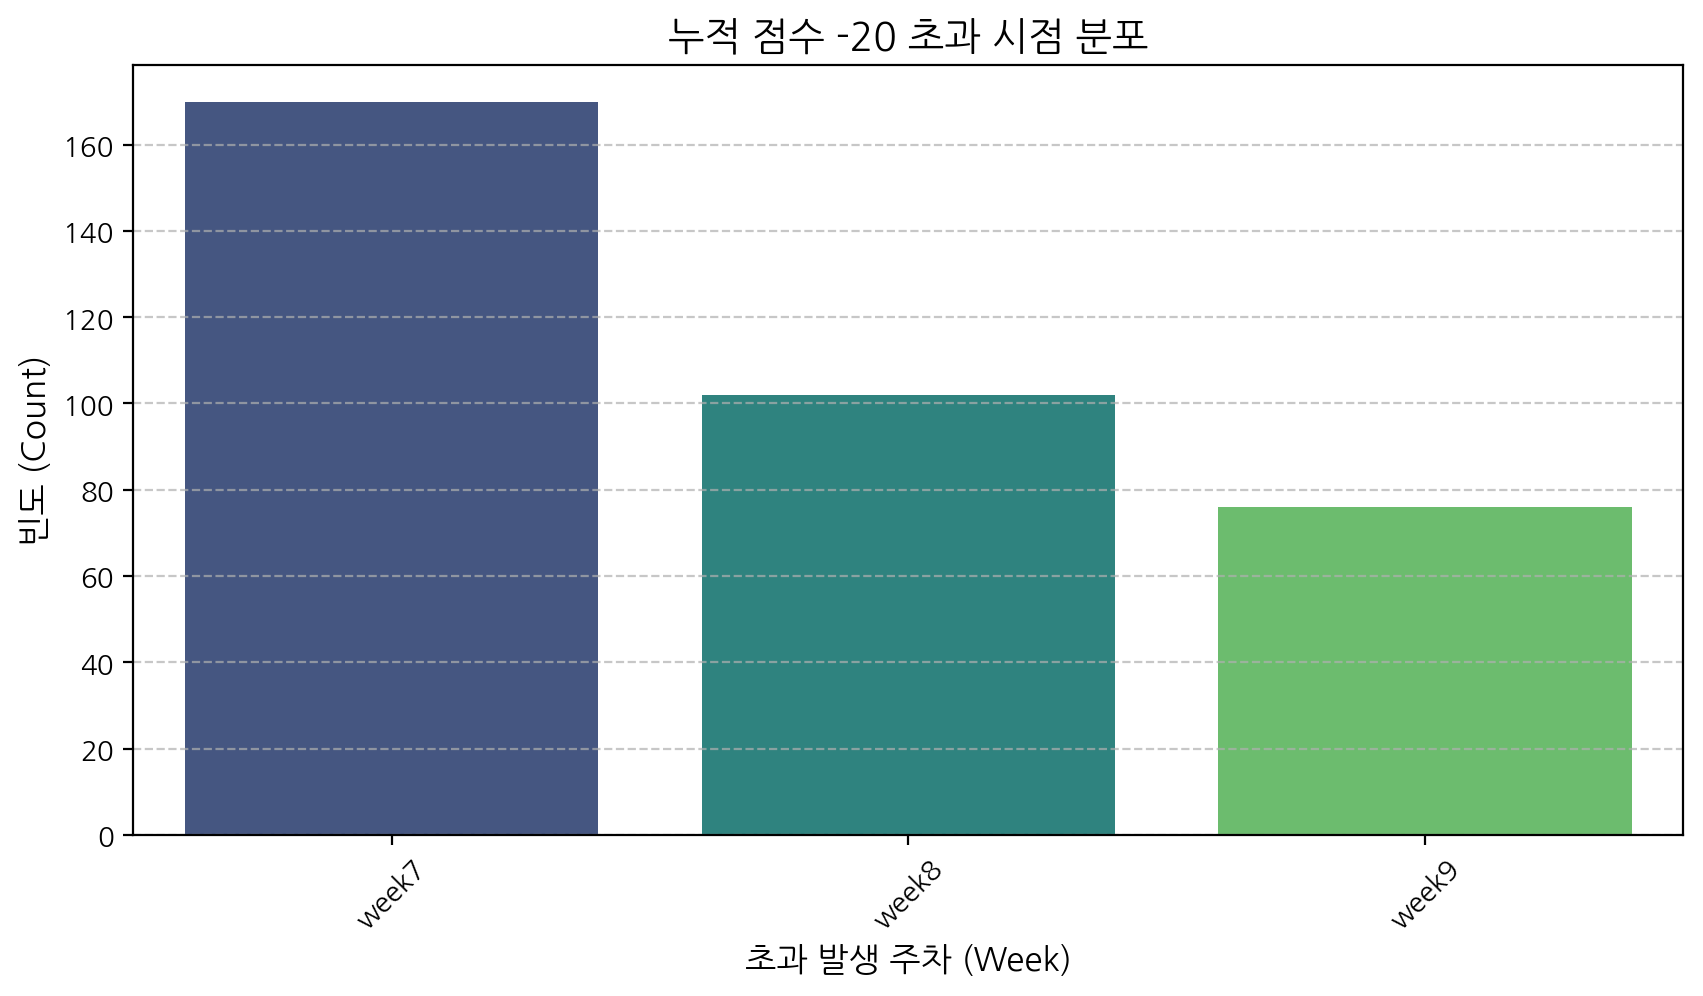

In [181]:
df = total_df_X[['week3_x', 'week4_x',
       'week5_x', 'week6_x', 'week7_x', 'week8_x', 'week9_x', 'week10',
       'week2', 'week3_y', 'week4_y', 'week5_y', 'week6_y', 'week7_y',
       'week8_y', 'week9_y']]

# 점수 매핑
score_x = {2: 0, 1: -2, 0: -5}  # 기존 점수
score_y = {2: 0, 1: -1, 0: -2}  # 과제 제출 점수

# 각각 매핑 적용
df_x = df[[col for col in df.columns if '_x' in col or col == 'week10']].replace(score_x)
df_y = df[[col for col in df.columns if '_y' in col or col == 'week2']].replace(score_y)

# 같은 주차끼리 합산
week_columns = sorted(set(col.split('_')[0] for col in df.columns))  # 'week2' ~ 'week10'
df_total = pd.DataFrame(index=df.index)

for week in week_columns:
    cols = [col for col in df.columns if col.startswith(week)]
    df_total[week] = df[cols].replace({**score_x, **score_y}).sum(axis=1)  # X, Y 점수 합산

# 누적 점수 계산
cumulative_score = df_total.cumsum(axis=1)

# -20점 초과한 첫 번째 주차 찾기
def find_exceed_column(row):
    for col in cumulative_score.columns:
        if row[col] < -20:
            return col
    return None

df['exceed_column'] = cumulative_score.apply(find_exceed_column, axis=1)

# exceed_column 값들의 빈도 계산
exceed_counts = df['exceed_column'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x=exceed_counts.index, y=exceed_counts.values, palette="viridis")

# 그래프 제목 및 라벨 추가
plt.title("누적 점수 -20 초과 시점 분포", fontsize=14)
plt.xlabel("초과 발생 주차 (Week)", fontsize=12)
plt.ylabel("빈도 (Count)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

### 수료율에 유의미한 영향을 주는 피처 찾기

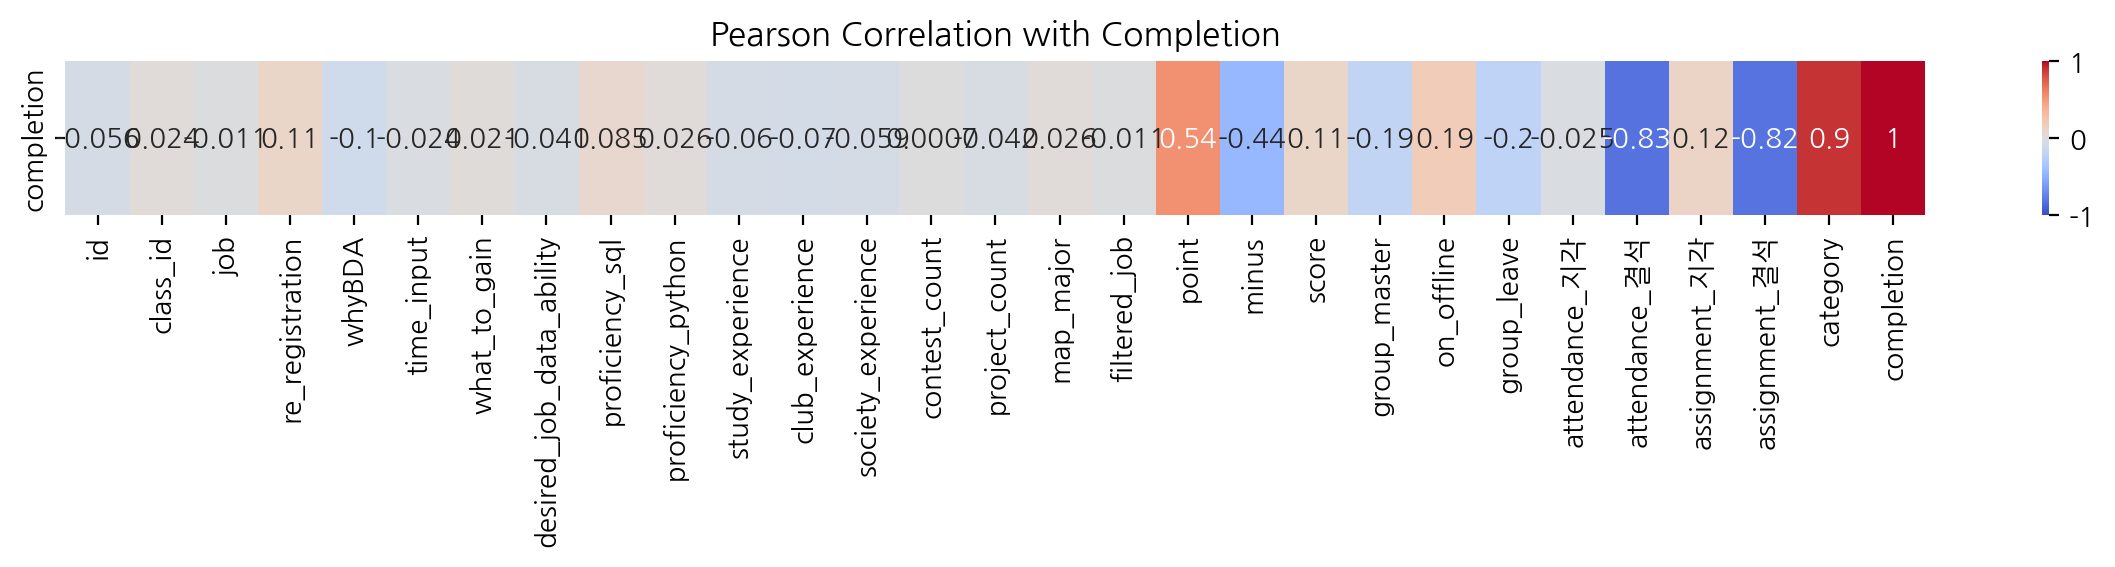

In [182]:
col_corr = total_df_X[['id', 'class_id', 'job', 're_registration', 'whyBDA', 'time_input',
       'what_to_gain', 'desired_job_data_ability', 'proficiency_sql',
       'proficiency_python', 'study_experience', 'club_experience',
       'society_experience', 'contest_count', 'project_count', 'map_major',
       'filtered_job', 'point', 'minus', 'score', 'group_master', 'on_offline', 'group_leave',
       'attendance_지각', 'attendance_결석', 'assignment_지각', 'assignment_결석',
       'category', 'completion']]

# Label Encoding 적용
encoder = LabelEncoder()
col_corr = col_corr.apply(lambda col: encoder.fit_transform(col.astype(str)))

# 피어슨 상관계수 계산
pearson_corr = col_corr.corr(method='pearson')

# 종속변수 'completion'과의 상관관계만 선택
pearson_corr_filtered = pearson_corr[['completion']].T  # Transpose로 보기 쉽게 변환

# 히트맵 그리기
plt.figure(figsize=(15, len(pearson_corr_filtered)))  # 가독성 고려한 크기 설정
sns.heatmap(pearson_corr_filtered, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# 그래프 설정
plt.title("Pearson Correlation with Completion")
plt.show()
